In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./telecom_churn_data.csv')

In [3]:
from pandas import DataFrame
from IPython.display import HTML
HTML(DataFrame(df.head()).to_html())

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
HTML(DataFrame(df.describe(percentiles=[.25,.5,.75,.90,.95,.99])).to_html())

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


Finding out the null value columns

In [6]:
HTML(DataFrame(((df.isnull().sum(axis=0)/len(df.index))*100).sort_values(ascending=False)).to_html())

,0
count_rech_2g_6,74.846748
date_of_last_rech_data_6,74.846748
count_rech_3g_6,74.846748
av_rech_amt_data_6,74.846748
max_rech_data_6,74.846748
total_rech_data_6,74.846748
arpu_3g_6,74.846748
arpu_2g_6,74.846748
night_pck_user_6,74.846748
fb_user_6,74.846748


As we can see either there are columns with more than 70% missing data or 7% or less. Digging a little deeper on these columns

In [7]:
cols_with_null_gt_70 = df.columns[(round((df.isnull().sum(axis=0)/len(df.index))*100,2)) > 70]

In [8]:
cols_with_null_gt_70

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [9]:
len(cols_with_null_gt_70)

40

In [10]:
HTML(DataFrame(df[cols_with_null_gt_70].describe(percentiles=[.25,.5,.75,.90,.95,.99])).to_html())

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,192.600982,200.981292,197.526489,192.734315,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026,0.025086,0.023034,0.020844,0.015971,0.914404,0.908764,0.890808,0.860968
std,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,192.646318,196.791224,191.301305,188.400286,193.124653,195.893924,188.180936,216.291992,172.767523,176.379871,168.247852,171.384224,0.156391,0.150014,0.142863,0.125366,0.279772,0.287950,0.311885,0.345987
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000,-30.820000,-26.040000,-24.490000,-71.090000,-35.830000,-15.480000,-55.830000,-45.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,92.000000,87.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000,164.000000,0.480000,0.420000,0.880000,2.605000,10.830000,8.810000,9.270000,14.800000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,252.000000,122.070000,119.560000,122.070000,140.010000,122.070000,122.070000,122.070000,140.010000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
90%,5.000000,6.000000,6.000000,5.000000,252.000000,252.000000,252.000000,252.00000,5.000000,5.000000,5.000000,4.000000,2.000000,2.000000,2.000000,2.000000,358.000000,396.000000,396.000000,373.000000,247.170000,244.140000,250.682000,280.020000,224.000000,221.970000,224.000000,239.060000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
95%,8.000000,9.000000,8.000000,7.000000,252.000000,252.000000,252.000000,252.00000,7.000000,8.000000,8.000000,6.000000,2.000000,2.000000,2.000000,2.000000,504.000000,504.000000,504.000000,504.000000,427.128000,428.075000,426.924000,442.627500,423.988000,424.340000,423.210000,424.340000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
99%,14.000000,14.000000,14.000000,12.000000,505.000000,455.000000,455.000000,455.00000,12.000000,13.000000,13.000000,10.000000,5.000000,6.000000,6.000000,6.000000,907.000000,951.000000,9

In [11]:
cols_binary_df =['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
                'fb_user_6','fb_user_7','fb_user_8','fb_user_9']

In [12]:
for col in cols_binary_df:
    print('{} -> {}'.format(col,df[col].unique()))

night_pck_user_6 -> [ 0. nan  1.]
night_pck_user_7 -> [ 0. nan  1.]
night_pck_user_8 -> [ 0. nan  1.]
night_pck_user_9 -> [nan  0.  1.]
fb_user_6 -> [ 1. nan  0.]
fb_user_7 -> [ 1. nan  0.]
fb_user_8 -> [ 1. nan  0.]
fb_user_9 -> [nan  1.  0.]


As can be seen, these values are for services which a user might or might not avail because they are data services. Thus instead of dropping the columns, we would impute them with 0 stating that the utilization of these services are zero. However, lets drop the date fields as that would not help in any data prediction

In [13]:
df = df.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'],axis=1)

In [14]:
len(df.columns)

222

Updating column fields with 70% null values by removing the date fields

In [15]:
cols_with_null_gt_70 = list(set(cols_with_null_gt_70) - set(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']))

In [16]:
cols_with_null_gt_70

['arpu_2g_7',
 'arpu_2g_8',
 'max_rech_data_9',
 'arpu_3g_8',
 'arpu_3g_6',
 'count_rech_3g_6',
 'count_rech_2g_8',
 'count_rech_2g_7',
 'av_rech_amt_data_8',
 'max_rech_data_8',
 'max_rech_data_7',
 'max_rech_data_6',
 'night_pck_user_9',
 'fb_user_6',
 'count_rech_3g_9',
 'total_rech_data_7',
 'count_rech_3g_7',
 'arpu_3g_9',
 'fb_user_9',
 'count_rech_2g_9',
 'count_rech_2g_6',
 'arpu_2g_9',
 'night_pck_user_8',
 'arpu_3g_7',
 'av_rech_amt_data_7',
 'arpu_2g_6',
 'av_rech_amt_data_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'total_rech_data_8',
 'fb_user_8',
 'total_rech_data_9',
 'total_rech_data_6',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'fb_user_7']

In [17]:
for col in cols_with_null_gt_70:
    df.loc[np.isnan(df[col]),col] = 0

In [18]:
HTML(DataFrame(((df.isnull().sum(axis=0)/len(df.index))*100).sort_values(ascending=False)).to_html())

,0
std_ic_t2o_mou_9,7.745077
std_og_t2m_mou_9,7.745077
offnet_mou_9,7.745077
std_og_t2c_mou_9,7.745077
roam_ic_mou_9,7.745077
std_ic_t2f_mou_9,7.745077
std_og_t2f_mou_9,7.745077
roam_og_mou_9,7.745077
loc_og_t2t_mou_9,7.745077
loc_ic_mou_9,7.745077


As can be seen above, the above 70% data is already cleaned. Now lets look at the rows with a high number of nulls

In [19]:
df.isnull().sum(axis=1).sort_values(ascending=False).unique()

array([126, 125, 124, 123, 122, 121, 120, 119,  94,  93,  92,  91,  90,
        89,  88,  87,  63,  62,  61,  60,  59,  58,  33,  32,  31,  30,
        29,   3,   2,   1,   0], dtype=int64)

In [20]:
(len(df[df.isnull().sum(axis=1) > 120])/len(df.index))*100

0.4710047100471005

In [21]:
len(df[df.isnull().sum(axis=1) > 120])

471

As seen there is only 0.47% rows with more than 120 null columns. Lets drop those

In [22]:
df = df[df.isnull().sum(axis=1) < 120]

In [23]:
len(df.index)

99370

Now finding out the high value customers by averaging the total_rech_amt for month 6 and month 7

In [24]:
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6']+df['total_rech_amt_7'])/2

In [25]:
df['avg_rech_amt_6_7'].quantile(0.7)

370.0

In [26]:
len(df[df['avg_rech_amt_6_7']>=370.0].index)

29873

In [27]:
df_high_valued = df[df['avg_rech_amt_6_7']>=370.0]

Finally, creating the churned column amongst the high value customers

In [28]:
HTML(DataFrame(df_high_valued.head()).to_html())

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.7

In [29]:
churned_cust = df_high_valued.loc[:,['mobile_number','total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

In [30]:
churned_cust.head()

,mobile_number,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
7,7000701601,0.00,0.00,0.0,0.0
8,7001524846,34.91,142.18,0.0,0.0
13,7002191713,631.86,446.09,0.0,0.0
16,7000875565,334.56,255.74,0.0,0.0
17,7000187447,87.13,631.08,0.0,0.0


In [31]:
print('Data types of individual columns {} {} {} {}'.format(churned_cust['total_ic_mou_9'].dtype,churned_cust['total_og_mou_9'].dtype,
      churned_cust['vol_2g_mb_9'].dtype,churned_cust['vol_3g_mb_9'].dtype))

Data types of individual columns float64 float64 float64 float64


In [32]:
churned_cust['churned'] = (churned_cust['total_ic_mou_9'] + churned_cust['total_og_mou_9'] + churned_cust['vol_2g_mb_9'] + churned_cust['vol_3g_mb_9'])

In [33]:
churned_cust.head()

,mobile_number,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churned
7,7000701601,0.00,0.00,0.0,0.0,0.00
8,7001524846,34.91,142.18,0.0,0.0,177.09
13,7002191713,631.86,446.09,0.0,0.0,1077.95
16,7000875565,334.56,255.74,0.0,0.0,590.30
17,7000187447,87.13,631.08,0.0,0.0,718.21


In [34]:
churned_cust.columns

Index(['mobile_number', 'total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9',
       'vol_3g_mb_9', 'churned'],
      dtype='object')

In [35]:
churned_cust['churned'] = churned_cust['churned'].apply(lambda x: 1 if x==0.0 else 0)

In [36]:
churned_cust['churned'].sum()/len(churned_cust.index)

0.08559568841428715

As we can see there is only 8.5% churn rate. A highly imbalanced class. Also let's remove the columns used to generate churned attribute

In [37]:
churned_cust.drop(['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9'],axis=1,inplace=True)

In [38]:
churned_cust.head()

,mobile_number,churned
7,7000701601,1
8,7001524846,0
13,7002191713,0
16,7000875565,0
17,7000187447,0


In [39]:
df_high_valued_with_prediction = pd.merge(df_high_valued,churned_cust,how='inner',on='mobile_number')

In [40]:
HTML(DataFrame(df_high_valued_with_prediction.head()).to_html())

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churned
0,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.

In [41]:
HTML(DataFrame(df_high_valued_with_prediction[df_high_valued_with_prediction['mobile_number']==7000701601]).to_html())

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churned
0,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.18,1349.85,3171.48,500.0,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.0,NaN,422.16,533.91,255.79,NaN,4.3,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.5,0.0,6.5,NaN,0.0,0.0,0.0,NaN,487.53,609.24,350.16,0.0,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.

In [42]:
len(df_high_valued_with_prediction.index)

29873

Finally witting this dataframe to disk, to start the second phase of data cleaning

In [43]:
df_high_valued_with_prediction.to_csv('./telecom_churn_high_valued_cust',index=False)

Starting off with the high valued excel now

In [44]:
df = pd.read_csv('./telecom_churn_high_valued_cust')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29873 entries, 0 to 29872
Columns: 224 entries, mobile_number to churned
dtypes: float64(180), int64(36), object(8)
memory usage: 51.1+ MB


In [46]:
HTML(DataFrame(df.head()).to_html())

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churned
0,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.

Finding out what columns which still have null values

In [47]:
HTML(DataFrame(df.isnull().sum().sort_values(ascending=False)).to_html())

,0
loc_ic_t2t_mou_9,1667
spl_ic_mou_9,1667
isd_ic_mou_9,1667
roam_ic_mou_9,1667
og_others_9,1667
spl_og_mou_9,1667
roam_og_mou_9,1667
isd_og_mou_9,1667
loc_og_t2t_mou_9,1667
std_og_mou_9,1667


Before moving ahead, we would delete all the columns with _9 as they won't be used for forecasting

In [48]:
cols_9 = df.filter(regex=('_9')).columns

In [49]:
print(cols_9)
len(cols_9)

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9',
       'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9',
       'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9',
       'sachet

53

In [50]:
df.drop(cols_9,axis=1,inplace=True)

In [51]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churned
0,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,...,0.0,0.0,0.0,802,57.74,19.38,18.74,0.0,1185.0,1
1,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,0.0,1.0,1.0,315,21.03,910.65,122.16,0.0,519.0,0
2,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,...,0.0,0.0,1.0,2607,0.00,0.00,0.00,0.0,380.0,0
3,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,...,0.0,0.0,0.0,511,0.00,2.45,21.89,0.0,459.0,0
4,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,690.008,18.980,...,0.0,0.0,0.0,667,0.00,0.00,0.00,0.0,408.0,0


Now lets see how many columns are still there with 1 or more null values

In [52]:
cols_with_na = df.columns[df.isnull().sum() > 0]

In [53]:
len(cols_with_na)

95

In [54]:
HTML(DataFrame(df[cols_with_na].describe(percentiles=[0.25,.50,0.75,0.90,0.95,0.99])).to_html())

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8
count,29793.0,29793.0,29793.0,29591.000000,29604.000000,28969.000000,29591.000000,29604.000000,28969.000000,29591.000000,29604.000000,28969.000000,29591.000000,29604.000000,28969.000000,29591.000000,29604.000000,28969.000000,29591.000000,29604.000000,28969.000000,29591.000000,29604.000000,28969.000000,29591.00000,29604.000000,28969.000000,29591.000000,29604.000000,28969.000000,29591.000000,29604.000000,28969.000000,29591.000000,29604.000000,28969.000000,29591.000000,29604.000000,28969.000000,29591.0,29604.0,28969.0,29591.000000,29604.000000,28969.00000,29591.000000,29604.000000,28969.000000,29591.000000,29604.000000,28969.000000,29591.000000,29604.000000,28969.000000,29591.000000,29604.000000,28969.000000,29591.000000,29604.000000,28969.000000,29591.000000,29604.000000,28969.000000,29591.000000,29604.000000,28969.000000,29591.000000,29604.000000,28969.000000,29591.000000,29604.000000,28969.000000,29591.000000,29604.000000,28969.000000,29591.0,29604.0,28969.0,29591.000000,29604.000000,28969.000000,29591.000000,29604.000000,28969.000000,29591.000000,29604.000000,28969.000000,29591.000000,29604.000000,28969.000000
mean,0.0,0.0,0.0,299.804044,308.013230,276.730553,423.207203,429.078980,387.830838,17.637051,13.699516,13.715904,29.709394,22.318885,22.212913,95.862959,96.875843,90.078124,183.500215,183.410472,173.241809,7.060588,7.182986,6.714475,1.58545,1.882569,1.769457,286.432664,287.478362,270.043111,192.186703,202.287519,178.098368,205.731342,216.070596,185.780142,2.034313,2.060174,1.851031,0.0,0.0,0.0,399.956739,420.422663,365.73357,2.295863,2.235380,2.100439,5.981134,7.500907,7.109905,0.700876,0.048200,0.061075,69.526414,71.060710,68.117777,161.462142,162.565081,158.662233,15.761498,16.697751,15.192168,246.760007,250.333642,241.982070,16.428742,17.089786,15.557777,32.412600,33.861933,31.435376,2.912839,3.029393,2.773825,0.0,0.0,0.0,51.758199,53.985198,49.770843,0.067411,0.018211,0.028491,11.274998,12.482388,12.068579,1.203841,1.493537,1.277361
std,0.0,0.0,0.0,462.809661,483.804225,472.075965,471.631664,487.673094,480.827728,79.681393,76.808136,75.833278,119.354159,98.553555,108.050771,238.278180,249.562627,238.258722,251.069552,241.556502,236.828714,22.803995,22.726504,20.540495,6.93206,9.312047,7.516449,381.368118,377.131294,369.667882,411.992009,430.322537,415.927188,415.720932,440.247244,422.772588,12.534310,13.438676,11.900886,0.0,0.0,0.0,609.096322,640.050735,623.53216,46.241980,45.930036,45.590761,18.705952,23.184839,23.248823,2.294787,2.760556,3.379431,159.492179,168.180987,157.932850,222.804979,220.189768,218.871118,46.072993,49.764729,44.376138,313.757147,316.384649,309.247842,79.383586,85.

As we can see there are a lot of columns with all zeroes. Dropping those columns off

In [55]:
cols_with_all_zeros = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7',
                       'std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']

In [56]:
df[cols_with_all_zeros].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
count,29793.0,29793.0,29793.0,29591.0,29604.0,28969.0,29591.0,29604.0,28969.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
df.drop(cols_with_all_zeros,axis=1,inplace=True)

In [58]:
df.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churned
0,7000701601,109,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,...,0.0,0.0,0.0,802,57.74,19.38,18.74,0.0,1185.0,1
1,7001524846,109,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,...,0.0,1.0,1.0,315,21.03,910.65,122.16,0.0,519.0,0
2,7002191713,109,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,593.260,501.76,108.39,...,0.0,0.0,1.0,2607,0.00,0.00,0.00,0.0,380.0,0
3,7000875565,109,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,187.894,50.51,74.01,...,0.0,0.0,0.0,511,0.00,2.45,21.89,0.0,459.0,0
4,7000187447,109,6/30/2014,7/31/2014,8/31/2014,690.008,18.980,25.499,1185.91,9.28,...,0.0,0.0,0.0,667,0.00,0.00,0.00,0.0,408.0,0


Updating columns with na with the dropped column names.

In [59]:
cols_with_na = list(set(cols_with_na) - set(cols_with_all_zeros))

In [60]:
len(cols_with_na)

86

In [61]:
HTML(DataFrame(df[cols_with_na].describe()).to_html())

,std_ic_t2f_mou_6,std_ic_mou_6,loc_og_mou_7,isd_og_mou_6,std_og_t2t_mou_7,std_ic_t2m_mou_6,roam_ic_mou_7,loc_og_t2m_mou_6,loc_og_t2t_mou_8,roam_ic_mou_6,loc_ic_mou_8,isd_ic_mou_7,std_og_t2t_mou_8,std_ic_t2t_mou_6,roam_og_mou_8,roam_ic_mou_8,spl_og_mou_7,onnet_mou_6,loc_ic_t2t_mou_6,std_ic_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_7,spl_ic_mou_6,onnet_mou_7,loc_og_t2c_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_7,isd_og_mou_8,og_others_6,loc_ic_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_mou_8,isd_ic_mou_6,loc_ic_t2f_mou_6,loc_og_t2c_mou_6,spl_ic_mou_7,std_ic_t2t_mou_7,spl_ic_mou_8,std_og_t2m_mou_8,std_og_t2t_mou_6,loc_ic_t2f_mou_8,loc_og_t2f_mou_6,offnet_mou_8,loc_ic_mou_7,loc_og_t2t_mou_6,offnet_mou_7,offnet_mou_6,loc_og_t2c_mou_7,ic_others_6,loc_og_t2f_mou_8,loc_ic_t2m_mou_6,ic_others_8,std_og_t2f_mou_8,roam_og_mou_7,std_og_t2f_mou_6,isd_og_mou_7,loc_ic_t2f_mou_7,spl_og_mou_6,onnet_mou_8,spl_og_mou_8,std_og_mou_6,loc_og_t2t_mou_7,loc_og_mou_8,std_og_t2f_mou_7,loc_ic_t2t_mou_7,std_og_mou_7,loc_ic_mou_6,og_others_7,og_others_8,loc_og_mou_6,loc_ic_t2m_mou_7,std_ic_t2f_mou_7,roam_og_mou_6,std_ic_t2f_mou_8,std_ic_mou_7,std_ic_t2m_mou_8,ic_others_7,isd_ic_mou_8,loc_og_t2m_mou_7,loc_ic_t2m_mou_8
count,29591.000000,29591.000000,29604.000000,29591.000000,29604.000000,29591.000000,29604.000000,29591.000000,28969.000000,29591.000000,28969.000000,29604.000000,28969.000000,29591.000000,28969.000000,28969.000000,29604.000000,29591.000000,29591.000000,28969.000000,28969.000000,29604.000000,29591.000000,29604.000000,28969.000000,28969.000000,29604.000000,28969.000000,29591.000000,28969.000000,29591.000000,29604.000000,28969.00000,29591.000000,29591.000000,29591.00000,29604.000000,29604.000000,28969.000000,28969.000000,29591.000000,28969.000000,29591.000000,28969.000000,29604.000000,29591.000000,29604.000000,29591.000000,29604.000000,29591.000000,28969.000000,29591.000000,28969.000000,28969.000000,29604.000000,29591.000000,29604.000000,29604.000000,29591.000000,28969.000000,28969.000000,29591.000000,29604.000000,28969.000000,29604.000000,29604.000000,29604.000000,29591.000000,29604.000000,28969.000000,29591.000000,29604.000000,29604.000000,29591.000000,28969.000000,29604.000000,28969.000000,29604.000000,28969.000000,29604.000000,28969.000000
mean,2.912839,51.758199,287.478362,2.295863,202.287519,32.412600,13.699516,183.500215,90.078124,17.637051,241.982070,12.482388,178.098368,16.428742,22.212913,13.715904,7.500907,299.804044,69.526414,49.770843,173.241809,7.182986,0.067411,308.013230,1.769457,15.557777,33.861933,2.100439,0.700876,68.117777,205.731342,216.070596,365.73357,11.274998,15.761498,1.58545,0.018211,17.089786,0.028491,185.780142,192.186703,15.192168,7.060588,387.830838,250.333642,95.862959,429.078980,423.207203,1.882569,1.203841,6.714475,161.462142,1.277361,1.851031,22.318885,2.034313,2.235380,16.697751,5.981134,276.730553,7.109905,399.956739,96.875843,270.043111,2.060174,71.060710,420.422663,246.760007,0.048200,0.061075,286.432664,162.565081,3.029393,29.709394,2.773825,53.985198,31.435376,1.493537,12.068579,183.410472,158.662233
std,20.066286,141.357385,377.131294,46.241980,430.322537,101.719255,76.808136,251.069552,238.258722,79.681393,309.247842,77.428216,415.927188,79.383586,108.050771,75.833278,23.184839,462.809661,159.492179,143.141851,236.828714,22.726504,0.195297,483.804225,7.516449,73.652860,106.434430,45.590761,2.294787,157.932850,415.720932,440.247244,623.53216,67.620934,46.072993,6.93206,0.183026,85.236389,0.118219,422.772588,411.992009,44.376138,22.803995,480.827728,316.384649,238.278180,487.673094,471.631664,9.312047,14.084763,20.540495,222.804979,13.112124,11.900886,98.553555,12.534310,45.930036,49.764729,18.705952,472.075965,23.248823,609.096322,249.562627,369.667882,13.438676,168.180987,640.050735,313.757147,2.760556,3.379431,381.368118,220.189768,20.645737,119.354159,20.623703,150.052727,106.981522,15.505895,76.144644,241.556502,218.871118
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [62]:
HTML(DataFrame(df[cols_with_na].head()).to_html())

,std_ic_t2f_mou_6,std_ic_mou_6,loc_og_mou_7,isd_og_mou_6,std_og_t2t_mou_7,std_ic_t2m_mou_6,roam_ic_mou_7,loc_og_t2m_mou_6,loc_og_t2t_mou_8,roam_ic_mou_6,loc_ic_mou_8,isd_ic_mou_7,last_date_of_month_7,std_og_t2t_mou_8,std_ic_t2t_mou_6,roam_og_mou_8,roam_ic_mou_8,spl_og_mou_7,onnet_mou_6,loc_ic_t2t_mou_6,std_ic_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_7,spl_ic_mou_6,onnet_mou_7,loc_og_t2c_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_7,date_of_last_rech_7,isd_og_mou_8,og_others_6,loc_ic_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_mou_8,isd_ic_mou_6,loc_ic_t2f_mou_6,loc_og_t2c_mou_6,date_of_last_rech_8,spl_ic_mou_7,std_ic_t2t_mou_7,spl_ic_mou_8,std_og_t2m_mou_8,std_og_t2t_mou_6,loc_ic_t2f_mou_8,date_of_last_rech_6,loc_og_t2f_mou_6,offnet_mou_8,last_date_of_month_8,loc_ic_mou_7,loc_og_t2t_mou_6,offnet_mou_7,offnet_mou_6,loc_og_t2c_mou_7,ic_others_6,loc_og_t2f_mou_8,loc_ic_t2m_mou_6,ic_others_8,std_og_t2f_mou_8,roam_og_mou_7,std_og_t2f_mou_6,isd_og_mou_7,loc_ic_t2f_mou_7,spl_og_mou_6,onnet_mou_8,spl_og_mou_8,std_og_mou_6,loc_og_t2t_mou_7,loc_og_mou_8,std_og_t2f_mou_7,loc_ic_t2t_mou_7,std_og_mou_7,loc_ic_mou_6,og_others_7,og_others_8,loc_og_mou_6,loc_ic_t2m_mou_7,std_ic_t2f_mou_7,roam_og_mou_6,std_ic_t2f_mou_8,std_ic_mou_7,std_ic_t2m_mou_8,ic_others_7,isd_ic_mou_8,loc_og_t2m_mou_7,loc_ic_t2m_mou_8
0,52.19,180.54,533.91,0.0,23.29,91.44,33.49,308.63,40.28,16.23,188.04,14.53,7/31/2014,12.01,36.89,38.06,31.64,0.00,57.84,58.14,193.94,162.28,55.14,0.21,54.68,0.00,30.39,126.99,7/25/2014,10.01,0.00,27.31,49.89,31.76,77.84,2.06,152.16,0.0,8/26/2014,0.0,11.83,0.0,49.14,4.30,39.53,6/27/2014,62.13,325.91,8/31/2014,355.23,51.39,567.16,453.43,0.0,15.74,53.23,217.56,15.14,16.68,12.59,6.66,0.18,101.46,4.50,52.29,6.50,60.86,31.38,255.79,20.08,32.26,75.14,427.88,0.0,0.0,422.16,221.49,34.24,23.74,22.21,173.08,141.33,15.19,31.59,447.38,121.19
1,0.00,22.43,288.18,0.0,133.43,22.43,0.00,80.96,12.49,0.00,15.79,0.00,7/31/2014,22.58,0.00,0.00,0.00,0.00,413.69,23.84,0.75,50.54,0.00,0.00,351.03,7.15,0.10,4.08,7/31/2014,0.00,0.00,0.31,13.69,10.04,98.28,0.00,0.00,0.0,8/30/2014,0.0,0.58,0.0,75.69,116.56,0.00,6/25/2014,0.00,136.48,8/31/2014,23.83,297.13,80.63,94.66,0.0,0.00,0.00,57.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,35.08,10.23,130.26,217.59,63.04,0.00,9.84,143.48,81.43,0.0,0.0,378.09,13.98,0.00,0.00,0.00,4.66,0.65,0.00,0.00,70.58,15.48
2,0.00,423.81,53.48,0.0,85.98,308.13,144.24,151.13,36.01,23.53,255.26,62.11,7/31/2014,498.23,115.68,1.44,72.11,0.00,501.76,67.88,474.41,294.46,0.00,0.45,108.39,0.49,154.58,29.79,7/22/2014,1.29,0.00,52.58,255.36,52.94,655.18,245.28,4.81,0.0,8/30/2014,0.0,38.29,0.0,156.94,446.41,7.49,6/20/2014,4.54,482.46,8/31/2014,26.11,49.63,119.28,413.31,0.0,83.48,23.51,142.88,21.44,0.00,35.26,0.00,0.00,0.00,0.00,534.24,4.78,701.78,6.19,353.99,0.00,7.58,138.93,215.58,0.0,0.0,205.31,18.53,0.00,7.98,1.91,68.09,317.91,16.24,393.39,47.28,195.18
3,0.51,87.99,215.64,0.0,2.58,18.68,2.83,273.29,67.38,0.00,211.78,0.00,7/31/2014,3.23,68.79,0.00,0.00,3.26,50.51,41.33,82.44,128.28,4.48,0.00,74.01,0.00,6.33,73.08,7/31/2014,0.00,0.00,28.89,22.99,64.51,21.53,0.00,8.71,0.0,8/14/2014,0.0,78.64,0.0,18.29,7.89,32.71,6/30/2014,0.00,162.76,8/31/2014,229.83,42.61,229.74,296.29,0.0,0.00,10.26,226.81,0.00,0.00,17.74,0.00,0.00,8.68,0.00,70.61,5.91,30.89,65.16,205.93,0.00,71.44,67.09,276.86,0.0,0.0,315.91,149.69,0.00,0.00,2.18,151.73,73.93,0.00,0.23,145.99,150.16
4,0.00,9.91,0.00,0.0,0.81,1.28,4.76,58.54,0.00,0.00,0.00,0.00,7/31/2014,0.00,8.63,13.34,4.81,0.00,1185.91,34.54,0.00,0.00,0.00,0.00,9.28,0.00,0.00,0.00,7/30/2014,0.00,0.93,0.00,1.55,0.00,0.00,0.00,0.00,0.0,8/25/2014,0.0,0.00,0.0,0.00,1146.91,0.00,6/30/2014,0.00,5.54,8/31/2014,2.31,38.99,0.00,61.64,0.0,0.00,0.00,47.41,0.00,0.00,8.46,0.00,0.00,0.00,2.58,7.79,0.00,1148.46,0.00,0.00,0.00,0.00,0.81,81.96,0.0,0.0,97.54,2.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


We drop the last day of the month columns as this should not have an effect on our prediction

In [63]:
df.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1,inplace=True)

In [64]:
cols_with_na_obj=['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']

In [65]:
df[cols_with_na_obj].mode()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,6/30/2014,7/31/2014,8/31/2014


Imputing the date objects wih the mode of the corresponding date columns

In [66]:
df.loc[pd.isnull(df['date_of_last_rech_6']),'date_of_last_rech_6'] = '6/30/2014'

In [67]:
df.loc[pd.isnull(df['date_of_last_rech_7']),'date_of_last_rech_7'] = '7/31/2014'

In [68]:
df.loc[pd.isnull(df['date_of_last_rech_8']),'date_of_last_rech_8'] = '8/31/2014'

In [69]:
len(df[(df.isnull().sum(axis=1) >= 1) & (df['churned']==1)])/len(df[df['churned']==1])

0.29565897536175206

Thus 29.6% of rows have values churned =1 and also has na values

In [70]:
len(df[(df.isnull().sum(axis=1) == 0) & (df['churned']==1)])/len(df.index)

0.06028855488233522

In [71]:
len(df[(df['churned']==1)])/len(df.index)

0.08559568841428715

The above two statements indicate that we lose almost 2.5% of Churned data in this imbalanced class that we have. This is a huge loss

Lets see what columns have na values

In [72]:
cols_with_na = list(set(cols_with_na) - set(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
                                            'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']))

In [73]:
HTML(DataFrame(df[cols_with_na].describe()).to_html())

,std_ic_t2f_mou_6,std_ic_mou_6,loc_og_mou_7,isd_og_mou_6,std_og_t2t_mou_7,std_ic_t2m_mou_6,roam_ic_mou_7,loc_og_t2m_mou_6,loc_og_t2t_mou_8,roam_ic_mou_6,loc_ic_mou_8,isd_ic_mou_7,std_og_t2t_mou_8,std_ic_t2t_mou_6,roam_og_mou_8,roam_ic_mou_8,spl_og_mou_7,onnet_mou_6,loc_ic_t2t_mou_6,std_ic_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_7,spl_ic_mou_6,onnet_mou_7,loc_og_t2c_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_7,isd_og_mou_8,og_others_6,loc_ic_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_mou_8,isd_ic_mou_6,loc_ic_t2f_mou_6,loc_og_t2c_mou_6,spl_ic_mou_7,std_ic_t2t_mou_7,spl_ic_mou_8,std_og_t2m_mou_8,std_og_t2t_mou_6,loc_ic_t2f_mou_8,loc_og_t2f_mou_6,offnet_mou_8,loc_ic_mou_7,loc_og_t2t_mou_6,offnet_mou_7,offnet_mou_6,loc_og_t2c_mou_7,ic_others_6,loc_og_t2f_mou_8,loc_ic_t2m_mou_6,ic_others_8,std_og_t2f_mou_8,roam_og_mou_7,std_og_t2f_mou_6,isd_og_mou_7,loc_ic_t2f_mou_7,spl_og_mou_6,onnet_mou_8,spl_og_mou_8,std_og_mou_6,loc_og_t2t_mou_7,loc_og_mou_8,std_og_t2f_mou_7,loc_ic_t2t_mou_7,std_og_mou_7,loc_ic_mou_6,og_others_7,og_others_8,loc_og_mou_6,loc_ic_t2m_mou_7,std_ic_t2f_mou_7,roam_og_mou_6,std_ic_t2f_mou_8,std_ic_mou_7,std_ic_t2m_mou_8,ic_others_7,isd_ic_mou_8,loc_og_t2m_mou_7,loc_ic_t2m_mou_8
count,29591.000000,29591.000000,29604.000000,29591.000000,29604.000000,29591.000000,29604.000000,29591.000000,28969.000000,29591.000000,28969.000000,29604.000000,28969.000000,29591.000000,28969.000000,28969.000000,29604.000000,29591.000000,29591.000000,28969.000000,28969.000000,29604.000000,29591.000000,29604.000000,28969.000000,28969.000000,29604.000000,28969.000000,29591.000000,28969.000000,29591.000000,29604.000000,28969.00000,29591.000000,29591.000000,29591.00000,29604.000000,29604.000000,28969.000000,28969.000000,29591.000000,28969.000000,29591.000000,28969.000000,29604.000000,29591.000000,29604.000000,29591.000000,29604.000000,29591.000000,28969.000000,29591.000000,28969.000000,28969.000000,29604.000000,29591.000000,29604.000000,29604.000000,29591.000000,28969.000000,28969.000000,29591.000000,29604.000000,28969.000000,29604.000000,29604.000000,29604.000000,29591.000000,29604.000000,28969.000000,29591.000000,29604.000000,29604.000000,29591.000000,28969.000000,29604.000000,28969.000000,29604.000000,28969.000000,29604.000000,28969.000000
mean,2.912839,51.758199,287.478362,2.295863,202.287519,32.412600,13.699516,183.500215,90.078124,17.637051,241.982070,12.482388,178.098368,16.428742,22.212913,13.715904,7.500907,299.804044,69.526414,49.770843,173.241809,7.182986,0.067411,308.013230,1.769457,15.557777,33.861933,2.100439,0.700876,68.117777,205.731342,216.070596,365.73357,11.274998,15.761498,1.58545,0.018211,17.089786,0.028491,185.780142,192.186703,15.192168,7.060588,387.830838,250.333642,95.862959,429.078980,423.207203,1.882569,1.203841,6.714475,161.462142,1.277361,1.851031,22.318885,2.034313,2.235380,16.697751,5.981134,276.730553,7.109905,399.956739,96.875843,270.043111,2.060174,71.060710,420.422663,246.760007,0.048200,0.061075,286.432664,162.565081,3.029393,29.709394,2.773825,53.985198,31.435376,1.493537,12.068579,183.410472,158.662233
std,20.066286,141.357385,377.131294,46.241980,430.322537,101.719255,76.808136,251.069552,238.258722,79.681393,309.247842,77.428216,415.927188,79.383586,108.050771,75.833278,23.184839,462.809661,159.492179,143.141851,236.828714,22.726504,0.195297,483.804225,7.516449,73.652860,106.434430,45.590761,2.294787,157.932850,415.720932,440.247244,623.53216,67.620934,46.072993,6.93206,0.183026,85.236389,0.118219,422.772588,411.992009,44.376138,22.803995,480.827728,316.384649,238.278180,487.673094,471.631664,9.312047,14.084763,20.540495,222.804979,13.112124,11.900886,98.553555,12.534310,45.930036,49.764729,18.705952,472.075965,23.248823,609.096322,249.562627,369.667882,13.438676,168.180987,640.050735,313.757147,2.760556,3.379431,381.368118,220.189768,20.645737,119.354159,20.623703,150.052727,106.981522,15.505895,76.144644,241.556502,218.871118
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

Clearly the spread in data is huge. Thus it would be better if we impute the values with the median

In [74]:
for col in cols_with_na:
    df.loc[np.isnan(df[col]),col] = df[col].quantile(0.5)

In [75]:
HTML(DataFrame(df[cols_with_na].describe()).to_html())

,std_ic_t2f_mou_6,std_ic_mou_6,loc_og_mou_7,isd_og_mou_6,std_og_t2t_mou_7,std_ic_t2m_mou_6,roam_ic_mou_7,loc_og_t2m_mou_6,loc_og_t2t_mou_8,roam_ic_mou_6,loc_ic_mou_8,isd_ic_mou_7,std_og_t2t_mou_8,std_ic_t2t_mou_6,roam_og_mou_8,roam_ic_mou_8,spl_og_mou_7,onnet_mou_6,loc_ic_t2t_mou_6,std_ic_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_7,spl_ic_mou_6,onnet_mou_7,loc_og_t2c_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_7,isd_og_mou_8,og_others_6,loc_ic_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_mou_8,isd_ic_mou_6,loc_ic_t2f_mou_6,loc_og_t2c_mou_6,spl_ic_mou_7,std_ic_t2t_mou_7,spl_ic_mou_8,std_og_t2m_mou_8,std_og_t2t_mou_6,loc_ic_t2f_mou_8,loc_og_t2f_mou_6,offnet_mou_8,loc_ic_mou_7,loc_og_t2t_mou_6,offnet_mou_7,offnet_mou_6,loc_og_t2c_mou_7,ic_others_6,loc_og_t2f_mou_8,loc_ic_t2m_mou_6,ic_others_8,std_og_t2f_mou_8,roam_og_mou_7,std_og_t2f_mou_6,isd_og_mou_7,loc_ic_t2f_mou_7,spl_og_mou_6,onnet_mou_8,spl_og_mou_8,std_og_mou_6,loc_og_t2t_mou_7,loc_og_mou_8,std_og_t2f_mou_7,loc_ic_t2t_mou_7,std_og_mou_7,loc_ic_mou_6,og_others_7,og_others_8,loc_og_mou_6,loc_ic_t2m_mou_7,std_ic_t2f_mou_7,roam_og_mou_6,std_ic_t2f_mou_8,std_ic_mou_7,std_ic_t2m_mou_8,ic_others_7,isd_ic_mou_8,loc_og_t2m_mou_7,loc_ic_t2m_mou_8
count,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000
mean,2.885342,51.415357,286.454757,2.274190,200.596127,32.176294,13.576155,182.746809,88.285493,17.470558,239.200376,12.369986,172.946407,16.284322,21.540718,13.300841,7.440837,298.188923,69.150265,48.677169,170.905571,7.122357,0.066775,306.394770,1.715911,15.110580,33.626890,2.036877,0.694259,66.917071,204.163162,214.478994,357.239076,11.168562,15.632157,1.570484,0.018047,16.947512,0.027629,180.985515,190.501701,14.796888,6.997524,383.727664,249.492922,95.272744,427.793691,421.917447,1.865617,1.192476,6.520666,160.840028,1.238706,1.795016,22.117908,2.015109,2.215251,16.568372,5.927127,271.581552,6.915327,397.427143,96.309029,266.645263,2.041623,70.698261,417.889053,245.880674,0.047766,0.059226,285.331939,161.985757,3.002114,29.428939,2.689885,53.647652,30.677164,1.480088,11.703367,182.715928,156.714236
std,19.973332,140.732405,375.582946,46.023729,428.747938,101.266924,76.472473,250.000814,234.845237,79.322731,304.939455,77.087823,410.622404,79.021845,106.471291,74.713969,23.088814,460.917000,158.784329,141.095201,233.592367,22.632884,0.194482,481.920138,7.408046,72.574008,105.982809,44.897059,2.284935,155.673237,414.065750,438.578481,615.904944,67.309828,45.874144,6.900965,0.182208,84.864867,0.116518,417.210197,410.405879,43.756767,22.705294,474.065715,315.080358,237.227865,485.659572,469.586118,9.271730,14.018607,20.257038,221.842370,12.914052,11.723716,98.131462,12.476557,45.723254,49.558744,18.625667,465.790916,22.920819,606.768055,248.507571,364.539209,13.379446,167.465205,637.716506,312.402548,2.748103,3.327920,379.731184,219.280350,20.554561,118.824191,20.314802,149.417547,105.437725,15.436566,75.012127,240.576788,215.815807
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

Thus we see the columns are almost statistically equal to each other before and after imputing

In [76]:
df.isnull().sum(axis=0).sort_values(ascending=False)

churned                0
spl_og_mou_8           0
loc_ic_t2t_mou_6       0
total_og_mou_8         0
total_og_mou_7         0
total_og_mou_6         0
og_others_8            0
og_others_7            0
og_others_6            0
spl_og_mou_7           0
loc_ic_t2t_mou_8       0
spl_og_mou_6           0
isd_og_mou_8           0
isd_og_mou_7           0
isd_og_mou_6           0
std_og_mou_8           0
std_og_mou_7           0
std_og_mou_6           0
loc_ic_t2t_mou_7       0
loc_ic_t2m_mou_6       0
std_og_t2f_mou_7       0
std_ic_t2t_mou_7       0
std_ic_t2f_mou_8       0
std_ic_t2f_mou_7       0
std_ic_t2f_mou_6       0
std_ic_t2m_mou_8       0
std_ic_t2m_mou_7       0
std_ic_t2m_mou_6       0
std_ic_t2t_mou_8       0
std_ic_t2t_mou_6       0
                      ..
isd_ic_mou_8           0
max_rech_amt_6         0
isd_ic_mou_7           0
isd_ic_mou_6           0
spl_ic_mou_8           0
spl_ic_mou_7           0
spl_ic_mou_6           0
total_ic_mou_8         0
total_ic_mou_7         0


In [77]:
len(df[(df.isnull().sum(axis=1) >= 1) & (df['churned']==1)])/len(df[df['churned']==1])

0.0

Thus all rows have been cleaned properly

In [78]:
len(df[(df.isnull().sum(axis=1) == 0) & (df['churned']==1)])/len(df.index)

0.08559568841428715

In [79]:
len(df[(df['churned']==1)])/len(df.index)

0.08559568841428715

Also we have now 8.5% churn rate which is a good enough number

In [80]:
HTML(DataFrame(df.describe()).to_html())

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churned
count,2.987300e+04,29873.0,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.0

The following lines of code would find out column names that need to be averaged and then averages the columns for months 6 & 7 while keeping the value for month 8 same. This is done because first two months are a good phase as mentioned during the business undesrtanding phase and an average amount is a good enough predictor for both the months. Also the following lines of code after averaging will drop the _6 and _7 columns which were used for averaging

In [81]:
cols_with_months = []
for col in df.columns:
    if (col[-1]=='6') |(col[-1]=='7')|(col[-1]=='8'):
        cols_with_months.append(col[0:-2])

In [82]:
cols_with_months = list(set(cols_with_months))

In [83]:
cols_with_months

['arpu_2g',
 'loc_og_mou',
 'loc_ic_mou',
 'loc_og_t2f_mou',
 'std_og_t2m_mou',
 'total_rech_amt',
 'spl_og_mou',
 'loc_ic_t2t_mou',
 'date_of_last_rech',
 'max_rech_data',
 'monthly_2g',
 'avg_rech_amt_6',
 'isd_og_mou',
 'fb_user',
 'total_og_mou',
 'offnet_mou',
 'std_ic_t2t_mou',
 'count_rech_3g',
 'vol_3g_mb',
 'night_pck_user',
 'roam_og_mou',
 'loc_og_t2c_mou',
 'count_rech_2g',
 'roam_ic_mou',
 'spl_ic_mou',
 'ic_others',
 'arpu',
 'vol_2g_mb',
 'std_og_mou',
 'arpu_3g',
 'total_rech_data',
 'std_ic_t2f_mou',
 'monthly_3g',
 'loc_og_t2t_mou',
 'std_og_t2t_mou',
 'av_rech_amt_data',
 'loc_og_t2m_mou',
 'og_others',
 'onnet_mou',
 'loc_ic_t2f_mou',
 'std_ic_t2m_mou',
 'max_rech_amt',
 'last_day_rch_amt',
 'loc_ic_t2m_mou',
 'std_ic_mou',
 'total_ic_mou',
 'sachet_3g',
 'isd_ic_mou',
 'std_og_t2f_mou',
 'sachet_2g',
 'total_rech_num']

In [84]:
cols_with_months = list(set(cols_with_months) - set(['date_of_last_rech','night_pck_user','fb_user','avg_rech_amt_6',
                                                    'total_rech_amt']))

In [85]:
cols_to_average = ['arpu','onnet_mou','offnet_mou','roam_ic_mou','roam_og_mou','loc_og_t2t_mou','loc_og_t2m_mou','loc_og_t2f_mou',
                  'loc_og_t2c_mou','loc_og_mou','std_og_t2t_mou','std_og_t2m_mou','std_og_t2f_mou','std_og_mou','isd_og_mou',
                  'spl_og_mou','og_others','total_og_mou','loc_ic_t2t_mou','loc_ic_t2m_mou','loc_ic_t2f_mou','loc_ic_mou',
                  'std_ic_t2t_mou','std_ic_t2m_mou','std_ic_t2f_mou','std_ic_mou','total_ic_mou','spl_ic_mou','isd_ic_mou',
                   'ic_others','total_rech_num','max_rech_amt','last_day_rch_amt','vol_2g_mb','vol_3g_mb','monthly_2g',
                   'sachet_2g','monthly_3g','sachet_3g','total_rech_amt']

In [86]:
print(cols_with_months)

['arpu_2g', 'loc_og_mou', 'loc_ic_mou', 'loc_og_t2f_mou', 'std_og_t2m_mou', 'spl_og_mou', 'loc_ic_t2t_mou', 'max_rech_data', 'monthly_2g', 'isd_og_mou', 'total_og_mou', 'offnet_mou', 'std_ic_t2t_mou', 'count_rech_3g', 'vol_3g_mb', 'roam_og_mou', 'loc_og_t2c_mou', 'count_rech_2g', 'roam_ic_mou', 'spl_ic_mou', 'ic_others', 'arpu', 'vol_2g_mb', 'std_og_mou', 'arpu_3g', 'total_rech_data', 'std_ic_t2f_mou', 'monthly_3g', 'loc_og_t2t_mou', 'std_og_t2t_mou', 'av_rech_amt_data', 'loc_og_t2m_mou', 'og_others', 'onnet_mou', 'loc_ic_t2f_mou', 'std_ic_t2m_mou', 'max_rech_amt', 'last_day_rch_amt', 'loc_ic_t2m_mou', 'std_ic_mou', 'total_ic_mou', 'sachet_3g', 'isd_ic_mou', 'std_og_t2f_mou', 'sachet_2g', 'total_rech_num']


In [87]:
def create_avg_col(col_name,df):
    col_name_6 = col_name+'_6'
    col_name_7 = col_name+'_7'
    avg_col_name = 'avg_'+col_name+'_6_7'
    df[avg_col_name] = (df.loc[:,col_name_6] + df.loc[:,col_name_7])/2
    df.drop([col_name_6,col_name_7],axis=1,inplace=True)

In [88]:
for col in cols_with_months:
    create_avg_col(col,df)

In [89]:
HTML(DataFrame(df.describe()).to_html())

,mobile_number,circle_id,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churned,avg_arpu_2g_6_7,avg_loc_og_mou_6_7,avg_loc_ic_mou_6_7,avg_loc_og_t2f_mou_6_7,avg_std_og_t2m_mou_6_7,avg_spl_og_mou_6_7,avg_loc_ic_t2t_mou_6_7,avg_max_rech_data_6_7,avg_monthly_2g_6_7,avg_isd_og_mou_6_7,avg_total_og_mou_6_7,avg_offnet_mou_6_7,avg_std_ic_t2t_mou_6_7,avg_count_rech_3g_6_7,avg_vol_3g_mb_6_7,avg_roam_og_mou_6_7,avg_loc_og_t2c_mou_6_7,avg_count_rech_2g_6_7,avg_roam_ic_mou_6_7,avg_spl_ic_mou_6_7,avg_ic_others_6_7,avg_arpu_6_7,avg_vol_2g_mb_6_7,avg_std_og_mou_6_7,avg_arpu_3g_6_7,avg_total_rech_data_6_7,avg_std_ic_t2f_mou_6_7,avg_monthly_3g_6_7,avg_loc_og_t2t_mou_6_7,avg_std_og_t2t_mou_6_7,avg_av_rech_amt_data_6_7,avg_loc_og_t2m_mou_6_7,avg_og_others_6_7,avg_onnet_mou_6_7,avg_loc_ic_t2f_mou_6_7,avg_std_ic_t2m_mou_6_7,avg_max_rech_amt_6_7,avg_last_day_rch_amt_6_7,avg_loc_ic_t2m_mou_6_7,avg_std_ic_mou_6_7,avg_total_ic_mou_6_7,avg_sachet_3g_6_7,avg_isd_ic_mou_6_7,avg_std_og_t2f_mou_6_7,avg_sachet_2g_6_7,avg_total_rech_num_6_7
count,2.987300e+04,29873.0,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000
mean,7.001223e+09,109.0,536.099178,271.581552,383.727664,13.300841,21.540718,88.285493,170.905571,6.520666,1.715911,266.645263,172.946407,180.985515,1.795016,357.239076,2.036877,6.915327,0.059226,625.536310,66.917071,156.714236,14.796888,239.200376,15.110580,30.677164,2.689885,48.677169,295.901469,0.027629,11.703367,1.238706,10.240083,698.244669,697.515549,615.099220,163.136946,95.777625,1.035952,55.316239,0.721789,0.314163,89.893294,69.283248,270.344219,52.234577,47.928533,0.010411,0.009909,0.009340,0.114183,0.607606,0.173568,0.140595,0.340609,0.345663,0.328156,1264.394068,129.558401,135.255350,121.285729,6.567774,697.880109,0.085596,50.950210,285.893348,247.686798,7.059940,209.321078,6.683982,69.924263,57.687042,0

Since VBC values are given as jun, jul and sep we need to average accordingly

In [90]:
df.drop(['sep_vbc_3g'],axis=1,inplace=True)

In [91]:
df['avg_jun_jul_vbc_3g'] = (df.loc[:,'jun_vbc_3g'] + df.loc[:,'jul_vbc_3g'])/2

In [92]:
df.drop(['jul_vbc_3g','jun_vbc_3g'],axis=1,inplace=True)

In [93]:
HTML(DataFrame(df.describe()).to_html())

,mobile_number,circle_id,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,avg_rech_amt_6_7,churned,avg_arpu_2g_6_7,avg_loc_og_mou_6_7,avg_loc_ic_mou_6_7,avg_loc_og_t2f_mou_6_7,avg_std_og_t2m_mou_6_7,avg_spl_og_mou_6_7,avg_loc_ic_t2t_mou_6_7,avg_max_rech_data_6_7,avg_monthly_2g_6_7,avg_isd_og_mou_6_7,avg_total_og_mou_6_7,avg_offnet_mou_6_7,avg_std_ic_t2t_mou_6_7,avg_count_rech_3g_6_7,avg_vol_3g_mb_6_7,avg_roam_og_mou_6_7,avg_loc_og_t2c_mou_6_7,avg_count_rech_2g_6_7,avg_roam_ic_mou_6_7,avg_spl_ic_mou_6_7,avg_ic_others_6_7,avg_arpu_6_7,avg_vol_2g_mb_6_7,avg_std_og_mou_6_7,avg_arpu_3g_6_7,avg_total_rech_data_6_7,avg_std_ic_t2f_mou_6_7,avg_monthly_3g_6_7,avg_loc_og_t2t_mou_6_7,avg_std_og_t2t_mou_6_7,avg_av_rech_amt_data_6_7,avg_loc_og_t2m_mou_6_7,avg_og_others_6_7,avg_onnet_mou_6_7,avg_loc_ic_t2f_mou_6_7,avg_std_ic_t2m_mou_6_7,avg_max_rech_amt_6_7,avg_last_day_rch_amt_6_7,avg_loc_ic_t2m_mou_6_7,avg_std_ic_mou_6_7,avg_total_ic_mou_6_7,avg_sachet_3g_6_7,avg_isd_ic_mou_6_7,avg_std_og_t2f_mou_6_7,avg_sachet_2g_6_7,avg_total_rech_num_6_7,avg_jun_jul_vbc_3g
count,2.987300e+04,29873.0,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000
mean,7.001223e+09,109.0,536.099178,271.581552,383.727664,13.300841,21.540718,88.285493,170.905571,6.520666,1.715911,266.645263,172.946407,180.985515,1.795016,357.239076,2.036877,6.915327,0.059226,625.536310,66.917071,156.714236,14.796888,239.200376,15.110580,30.677164,2.689885,48.677169,295.901469,0.027629,11.703367,1.238706,10.240083,698.244669,697.515549,615.099220,163.136946,95.777625,1.035952,55.316239,0.721789,0.314163,89.893294,69.283248,270.344219,52.234577,47.928533,0.010411,0.009909,0.009340,0.114183,0.607606,0.173568,0.140595,0.340609,0.345663,0.328156,1264.394068,129.558401,697.880109,0.085596,50.950210,285.893348,247.686798,7.059940,209.321078,6.683982,69.924263,57.687042,0.128176,2.244721,700.022285,424.855569,16.615917,0.323838,268.107869,25

In [94]:
df.drop(['total_rech_amt_6','total_rech_amt_7'],axis=1,inplace=True)

In [95]:
len(df.columns)

109

In [96]:
HTML(DataFrame(df.head()).to_html())

,mobile_number,circle_id,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,avg_rech_amt_6_7,churned,avg_arpu_2g_6_7,avg_loc_og_mou_6_7,avg_loc_ic_mou_6_7,avg_loc_og_t2f_mou_6_7,avg_std_og_t2m_mou_6_7,avg_spl_og_mou_6_7,avg_loc_ic_t2t_mou_6_7,avg_max_rech_data_6_7,avg_monthly_2g_6_7,avg_isd_og_mou_6_7,avg_total_og_mou_6_7,avg_offnet_mou_6_7,avg_std_ic_t2t_mou_6_7,avg_count_rech_3g_6_7,avg_vol_3g_mb_6_7,avg_roam_og_mou_6_7,avg_loc_og_t2c_mou_6_7,avg_count_rech_2g_6_7,avg_roam_ic_mou_6_7,avg_spl_ic_mou_6_7,avg_ic_others_6_7,avg_arpu_6_7,avg_vol_2g_mb_6_7,avg_std_og_mou_6_7,avg_arpu_3g_6_7,avg_total_rech_data_6_7,avg_std_ic_t2f_mou_6_7,avg_monthly_3g_6_7,avg_loc_og_t2t_mou_6_7,avg_std_og_t2t_mou_6_7,avg_av_rech_amt_data_6_7,avg_loc_og_t2m_mou_6_7,avg_og_others_6_7,avg_onnet_mou_6_7,avg_loc_ic_t2f_mou_6_7,avg_std_ic_t2m_mou_6_7,avg_max_rech_amt_6_7,avg_last_day_rch_amt_6_7,avg_loc_ic_t2m_mou_6_7,avg_std_ic_mou_6_7,avg_total_ic_mou_6_7,avg_sachet_3g_6_7,avg_isd_ic_mou_6_7,avg_std_og_t2f_mou_6_7,avg_sachet_2g_6_7,avg_total_rech_num_6_7,avg_jun_jul_vbc_3g
0,7000701601,109,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,6/27/2014,7/25/2014,8/26/2014,779,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,802,57.74,1185.0,1,0.0,478.035,391.555,58.635,40.825,2.25,45.200,0.0,0.0,0.09,548.385,510.295,24.360,0.0,0.000,18.165,0.0,0.0,24.860,0.105,15.465,1209.5150,0.0,68.000,0.0,0.0,43.215,0.0,41.385,13.795,0.0,378.005,0.000,56.260,126.810,109.215,1185.0,0.0,219.525,176.810,592.250,0.0,8.295,13.37,0.0,5.0,19.060
1,7001524846,109,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,6/25/2014,7/31/2014,8/30/2014,10,3.0,23.0,3.0,0.0,69.0,0.03,11.94,19.83,0.0,0.0,0.0,0.0,0,3,0,0,0.0,1.0,1.0,315,21.03,519.0,0,0.0,333.135,52.630,0.000,11.865,0.00,16.840,77.0,0.5,0.00,470.010,87.645,0.290,0.0,375.475,0.000,0.0,1.0,0.000,0.000,0.000,435.4720,178.0,136.870,0.0,1.0,0.000,0.0,257.360,124.995,88.5,75.770,0.000,382.360,0.000,13.255,122.0,25.0,35.780,13.545,66.175,0.0,0.000,0.00,0.5,20.0,516.405
2,7002191713,109,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11,717,130,6/20/2014,7/22/2014,8/30/2014,0,3.0,23.0,3.0,0.0,69.0,0.02,0.00,0.00,0.2,0.0,0.0,0.0,0,3,0,0,0.0,0.0,1.0,2607,0.00,380.0,0,0.0,129.395,120.845,2.270,154.150,0.00,37.730,0.0,0.0,0.00,549.750,266.295,76.985,0.0,0.000,21.620,0.0,0.0,83.885,0.225,49.860,349.2585,0.0,420.355,0.0,0.0,0.000,0.0,27.910,266.195,0.0,99.205,0.000,305.075,2.405,168.960,110.0,80.0,80.705,245.950,570.595,0.0,153.695,0.00,0.0,5.0,0.000
3,7000875565,109,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,0.00,5.91,0.0,233.38,28.89,150.16,32.71,211.78,6.33,73.93,2.18,82.44,294.46,0.0,0.23,0.00,2,160,130,6/30/2014,7/31/2014,8/14/2014,130,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0,0,0

In [97]:
print(df['circle_id'].unique(),df['date_of_last_rech_6'].unique(),df['date_of_last_rech_7'].unique(),df['date_of_last_rech_8'].unique())

[109] ['6/27/2014' '6/25/2014' '6/20/2014' '6/30/2014' '6/23/2014' '6/24/2014'
 '6/29/2014' '6/28/2014' '6/26/2014' '6/21/2014' '6/17/2014' '6/22/2014'
 '6/13/2014' '6/16/2014' '6/12/2014' '6/15/2014' '6/18/2014' '6/8/2014'
 '6/19/2014' '6/2/2014' '6/7/2014' '6/4/2014' '6/14/2014' '6/11/2014'
 '6/9/2014' '6/10/2014' '6/3/2014' '6/5/2014' '6/1/2014' '6/6/2014'] ['7/25/2014' '7/31/2014' '7/22/2014' '7/30/2014' '7/17/2014' '7/28/2014'
 '7/23/2014' '7/26/2014' '7/29/2014' '7/27/2014' '7/19/2014' '7/20/2014'
 '7/7/2014' '7/24/2014' '7/15/2014' '7/9/2014' '7/13/2014' '7/18/2014'
 '7/16/2014' '7/21/2014' '7/5/2014' '7/12/2014' '7/11/2014' '7/8/2014'
 '7/10/2014' '7/1/2014' '7/14/2014' '7/6/2014' '7/2/2014' '7/4/2014'
 '7/3/2014'] ['8/26/2014' '8/30/2014' '8/14/2014' '8/25/2014' '8/31/2014' '8/24/2014'
 '8/28/2014' '8/27/2014' '8/23/2014' '8/21/2014' '8/29/2014' '8/17/2014'
 '8/22/2014' '8/19/2014' '8/15/2014' '8/9/2014' '8/20/2014' '8/1/2014'
 '8/8/2014' '8/10/2014' '8/16/2014' '8/12/2014' '8

In [98]:
df.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','mobile_number','circle_id'],axis=1,inplace=True)

As seen above we decide to drop the date of last recharge based upon the spread of dates which is essentially random

In [99]:
HTML(DataFrame(df.head()).to_html())

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,avg_rech_amt_6_7,churned,avg_arpu_2g_6_7,avg_loc_og_mou_6_7,avg_loc_ic_mou_6_7,avg_loc_og_t2f_mou_6_7,avg_std_og_t2m_mou_6_7,avg_spl_og_mou_6_7,avg_loc_ic_t2t_mou_6_7,avg_max_rech_data_6_7,avg_monthly_2g_6_7,avg_isd_og_mou_6_7,avg_total_og_mou_6_7,avg_offnet_mou_6_7,avg_std_ic_t2t_mou_6_7,avg_count_rech_3g_6_7,avg_vol_3g_mb_6_7,avg_roam_og_mou_6_7,avg_loc_og_t2c_mou_6_7,avg_count_rech_2g_6_7,avg_roam_ic_mou_6_7,avg_spl_ic_mou_6_7,avg_ic_others_6_7,avg_arpu_6_7,avg_vol_2g_mb_6_7,avg_std_og_mou_6_7,avg_arpu_3g_6_7,avg_total_rech_data_6_7,avg_std_ic_t2f_mou_6_7,avg_monthly_3g_6_7,avg_loc_og_t2t_mou_6_7,avg_std_og_t2t_mou_6_7,avg_av_rech_amt_data_6_7,avg_loc_og_t2m_mou_6_7,avg_og_others_6_7,avg_onnet_mou_6_7,avg_loc_ic_t2f_mou_6_7,avg_std_ic_t2m_mou_6_7,avg_max_rech_amt_6_7,avg_last_day_rch_amt_6_7,avg_loc_ic_t2m_mou_6_7,avg_std_ic_mou_6_7,avg_total_ic_mou_6_7,avg_sachet_3g_6_7,avg_isd_ic_mou_6_7,avg_std_og_t2f_mou_6_7,avg_sachet_2g_6_7,avg_total_rech_num_6_7,avg_jun_jul_vbc_3g
0,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,802,57.74,1185.0,1,0.0,478.035,391.555,58.635,40.825,2.25,45.200,0.0,0.0,0.09,548.385,510.295,24.360,0.0,0.000,18.165,0.0,0.0,24.860,0.105,15.465,1209.5150,0.0,68.000,0.0,0.0,43.215,0.0,41.385,13.795,0.0,378.005,0.000,56.260,126.810,109.215,1185.0,0.0,219.525,176.810,592.250,0.0,8.295,13.37,0.0,5.0,19.060
1,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,3.0,23.0,3.0,0.0,69.0,0.03,11.94,19.83,0.0,0.0,0.0,0.0,0,3,0,0,0.0,1.0,1.0,315,21.03,519.0,0,0.0,333.135,52.630,0.000,11.865,0.00,16.840,77.0,0.5,0.00,470.010,87.645,0.290,0.0,375.475,0.000,0.0,1.0,0.000,0.000,0.000,435.4720,178.0,136.870,0.0,1.0,0.000,0.0,257.360,124.995,88.5,75.770,0.000,382.360,0.000,13.255,122.0,25.0,35.780,13.545,66.175,0.0,0.000,0.00,0.5,20.0,516.405
2,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11,717,130,0,3.0,23.0,3.0,0.0,69.0,0.02,0.00,0.00,0.2,0.0,0.0,0.0,0,3,0,0,0.0,0.0,1.0,2607,0.00,380.0,0,0.0,129.395,120.845,2.270,154.150,0.00,37.730,0.0,0.0,0.00,549.750,266.295,76.985,0.0,0.000,21.620,0.0,0.0,83.885,0.225,49.860,349.2585,0.0,420.355,0.0,0.0,0.000,0.0,27.910,266.195,0.0,99.205,0.000,305.075,2.405,168.960,110.0,80.0,80.705,245.950,570.595,0.0,153.695,0.00,0.0,5.0,0.000
3,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,0.00,5.91,0.0,233.38,28.89,150.16,32.71,211.78,6.33,73.93,2.18,82.44,294.46,0.0,0.23,0.00,2,160,130,130,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,511,0.00,459.0,0,0.0,265.775,253.345,2.240,43.750,1.63,56.385,0.0,0.0,0.00,316.410,263.015,73.715,0.0,0.000,8.870,0.0,0.0,1.415,0.000,0.000,365.4220,0.0,48.990,0.0,0.0,0.255,0.0,53.885,5.235,0.0,209.640,0.000,62.260,8.695,45.880,110.0,100.0,188.250,

In the following lines of code we average the binary value columns. We just add the values and finally come up with a 1 or zero based upon whether the services were activated on month 6 or month 7

In [100]:
binary_cols = ['night_pck_user','fb_user']

In [101]:
print(df['night_pck_user_6'].unique(),df['night_pck_user_7'].unique(),df['fb_user_6'].unique(),df['fb_user_7'].unique())

[0. 1.] [0. 1.] [0. 1.] [0. 1.]


In [102]:
def create_avg_bin_col(col_name,df):
    col_name_6 = col_name+'_6'
    col_name_7 = col_name+'_7'
    avg_col_name = 'avg_'+col_name+'_6_7'
    df[avg_col_name] = df.loc[:,col_name_6] + df.loc[:,col_name_7]
    df.drop([col_name_6,col_name_7],axis=1,inplace=True)

In [103]:
for col in binary_cols:
    create_avg_bin_col(col,df)

In [104]:
HTML(DataFrame(df.head()).to_html())

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aon,aug_vbc_3g,avg_rech_amt_6_7,churned,avg_arpu_2g_6_7,avg_loc_og_mou_6_7,avg_loc_ic_mou_6_7,avg_loc_og_t2f_mou_6_7,avg_std_og_t2m_mou_6_7,avg_spl_og_mou_6_7,avg_loc_ic_t2t_mou_6_7,avg_max_rech_data_6_7,avg_monthly_2g_6_7,avg_isd_og_mou_6_7,avg_total_og_mou_6_7,avg_offnet_mou_6_7,avg_std_ic_t2t_mou_6_7,avg_count_rech_3g_6_7,avg_vol_3g_mb_6_7,avg_roam_og_mou_6_7,avg_loc_og_t2c_mou_6_7,avg_count_rech_2g_6_7,avg_roam_ic_mou_6_7,avg_spl_ic_mou_6_7,avg_ic_others_6_7,avg_arpu_6_7,avg_vol_2g_mb_6_7,avg_std_og_mou_6_7,avg_arpu_3g_6_7,avg_total_rech_data_6_7,avg_std_ic_t2f_mou_6_7,avg_monthly_3g_6_7,avg_loc_og_t2t_mou_6_7,avg_std_og_t2t_mou_6_7,avg_av_rech_amt_data_6_7,avg_loc_og_t2m_mou_6_7,avg_og_others_6_7,avg_onnet_mou_6_7,avg_loc_ic_t2f_mou_6_7,avg_std_ic_t2m_mou_6_7,avg_max_rech_amt_6_7,avg_last_day_rch_amt_6_7,avg_loc_ic_t2m_mou_6_7,avg_std_ic_mou_6_7,avg_total_ic_mou_6_7,avg_sachet_3g_6_7,avg_isd_ic_mou_6_7,avg_std_og_t2f_mou_6_7,avg_sachet_2g_6_7,avg_total_rech_num_6_7,avg_jun_jul_vbc_3g,avg_night_pck_user_6_7,avg_fb_user_6_7
0,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0,0,0,0,0.0,802,57.74,1185.0,1,0.0,478.035,391.555,58.635,40.825,2.25,45.200,0.0,0.0,0.09,548.385,510.295,24.360,0.0,0.000,18.165,0.0,0.0,24.860,0.105,15.465,1209.5150,0.0,68.000,0.0,0.0,43.215,0.0,41.385,13.795,0.0,378.005,0.000,56.260,126.810,109.215,1185.0,0.0,219.525,176.810,592.250,0.0,8.295,13.37,0.0,5.0,19.060,0.0,0.0
1,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,3.0,23.0,3.0,0.0,69.0,0.03,11.94,19.83,0.0,0.0,0,3,0,0,1.0,315,21.03,519.0,0,0.0,333.135,52.630,0.000,11.865,0.00,16.840,77.0,0.5,0.00,470.010,87.645,0.290,0.0,375.475,0.000,0.0,1.0,0.000,0.000,0.000,435.4720,178.0,136.870,0.0,1.0,0.000,0.0,257.360,124.995,88.5,75.770,0.000,382.360,0.000,13.255,122.0,25.0,35.780,13.545,66.175,0.0,0.000,0.00,0.5,20.0,516.405,0.0,1.0
2,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11,717,130,0,3.0,23.0,3.0,0.0,69.0,0.02,0.00,0.00,0.2,0.0,0,3,0,0,1.0,2607,0.00,380.0,0,0.0,129.395,120.845,2.270,154.150,0.00,37.730,0.0,0.0,0.00,549.750,266.295,76.985,0.0,0.000,21.620,0.0,0.0,83.885,0.225,49.860,349.2585,0.0,420.355,0.0,0.0,0.000,0.0,27.910,266.195,0.0,99.205,0.000,305.075,2.405,168.960,110.0,80.0,80.705,245.950,570.595,0.0,153.695,0.00,0.0,5.0,0.000,0.0,0.0
3,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,0.00,5.91,0.0,233.38,28.89,150.16,32.71,211.78,6.33,73.93,2.18,82.44,294.46,0.0,0.23,0.00,2,160,130,130,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0,0,0,0,0.0,511,0.00,459.0,0,0.0,265.775,253.345,2.240,43.750,1.63,56.385,0.0,0.0,0.00,316.410,263.015,73.715,0.0,0.000,8.870,0.0,0.0,1.415,0.000,0.000,365.4220,0.0,48.990,0.0,0.0,0.255,0.0,53.885,5.235,0.0,209.640,0.000,62.260,8.695,45.880,110.0,100.0,188.250,119.860,373.210,0.0,0.000,0.00,0.0,8.0,12.170,0.0,0.0
4

In [105]:
HTML(DataFrame(df.describe()).to_html())

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aon,aug_vbc_3g,avg_rech_amt_6_7,churned,avg_arpu_2g_6_7,avg_loc_og_mou_6_7,avg_loc_ic_mou_6_7,avg_loc_og_t2f_mou_6_7,avg_std_og_t2m_mou_6_7,avg_spl_og_mou_6_7,avg_loc_ic_t2t_mou_6_7,avg_max_rech_data_6_7,avg_monthly_2g_6_7,avg_isd_og_mou_6_7,avg_total_og_mou_6_7,avg_offnet_mou_6_7,avg_std_ic_t2t_mou_6_7,avg_count_rech_3g_6_7,avg_vol_3g_mb_6_7,avg_roam_og_mou_6_7,avg_loc_og_t2c_mou_6_7,avg_count_rech_2g_6_7,avg_roam_ic_mou_6_7,avg_spl_ic_mou_6_7,avg_ic_others_6_7,avg_arpu_6_7,avg_vol_2g_mb_6_7,avg_std_og_mou_6_7,avg_arpu_3g_6_7,avg_total_rech_data_6_7,avg_std_ic_t2f_mou_6_7,avg_monthly_3g_6_7,avg_loc_og_t2t_mou_6_7,avg_std_og_t2t_mou_6_7,avg_av_rech_amt_data_6_7,avg_loc_og_t2m_mou_6_7,avg_og_others_6_7,avg_onnet_mou_6_7,avg_loc_ic_t2f_mou_6_7,avg_std_ic_t2m_mou_6_7,avg_max_rech_amt_6_7,avg_last_day_rch_amt_6_7,avg_loc_ic_t2m_mou_6_7,avg_std_ic_mou_6_7,avg_total_ic_mou_6_7,avg_sachet_3g_6_7,avg_isd_ic_mou_6_7,avg_std_og_t2f_mou_6_7,avg_sachet_2g_6_7,avg_total_rech_num_6_7,avg_jun_jul_vbc_3g,avg_night_pck_user_6_7,avg_fb_user_6_7
count,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000
mean,536.099178,271.581552,383.727664,13.300841,21.540718,88.285493,170.905571,6.520666,1.715911,266.645263,172.946407,180.985515,1.795016,357.239076,2.036877,6.915327,0.059226,625.536310,66.917071,156.714236,14.796888,239.200376,15.110580,30.677164,2.689885,48.677169,295.901469,0.027629,11.703367,1.238706,10.240083,615.099220,163.136946,95.777625,1.035952,55.316239,0.721789,0.314163,89.893294,69.283248,270.344219,52.234577,47.928533,0.009340,0.114183,0.607606,0.173568,0.140595,0.328156,1264.394068,129.558401,697.880109,0.085596,50.950210,285.893348,247.686798,7.059940,209.321078,6.683982,69.924263,57.687042,0.128176,2.244721,700.022285,424.855569,16.615917,0.323838,268.107869,25.773424,1.718050,0.671275,15.523357,0.042411,1.336282,589.163362,78.515744,407.658098,54.863291,0.995113,2.943728,0.179309,95.790887,195.548914,94.018352,182.731369,0.371013,302.291846,16.100264,32.901592,173.550765,104.861

In [106]:
df['avg_night_pck_user_6_7'] = df['avg_night_pck_user_6_7'].apply(lambda x : 0 if x==0.0 else 1)

In [107]:
df['avg_fb_user_6_7'] = df['avg_fb_user_6_7'].apply(lambda x : 0 if x==0.0 else 1)

In [108]:
df['avg_night_pck_user_6_7'].unique()

array([0, 1], dtype=int64)

In [109]:
df['avg_fb_user_6_7'].unique()

array([0, 1], dtype=int64)

Finally writting out to disk

In [110]:
df.to_csv('./telecom_churn_final_clean_dataset.csv',index=False)

We now start off with basic EDA and outlier treatment

In [111]:
df_clean = pd.read_csv('./telecom_churn_final_clean_dataset.csv')

In [112]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29873 entries, 0 to 29872
Columns: 102 entries, arpu_8 to avg_fb_user_6_7
dtypes: float64(90), int64(12)
memory usage: 23.2 MB


In [113]:
cols_independent = df_clean.drop('churned',axis=1).columns

In [114]:
cols_independent

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       ...
       'avg_std_ic_mou_6_7', 'avg_total_ic_mou_6_7', 'avg_sachet_3g_6_7',
       'avg_isd_ic_mou_6_7', 'avg_std_og_t2f_mou_6_7', 'avg_sachet_2g_6_7',
       'avg_total_rech_num_6_7', 'avg_jun_jul_vbc_3g',
       'avg_night_pck_user_6_7', 'avg_fb_user_6_7'],
      dtype='object', length=101)

In [115]:
len(cols_independent)

101

In [116]:
corr = df_clean.corr()

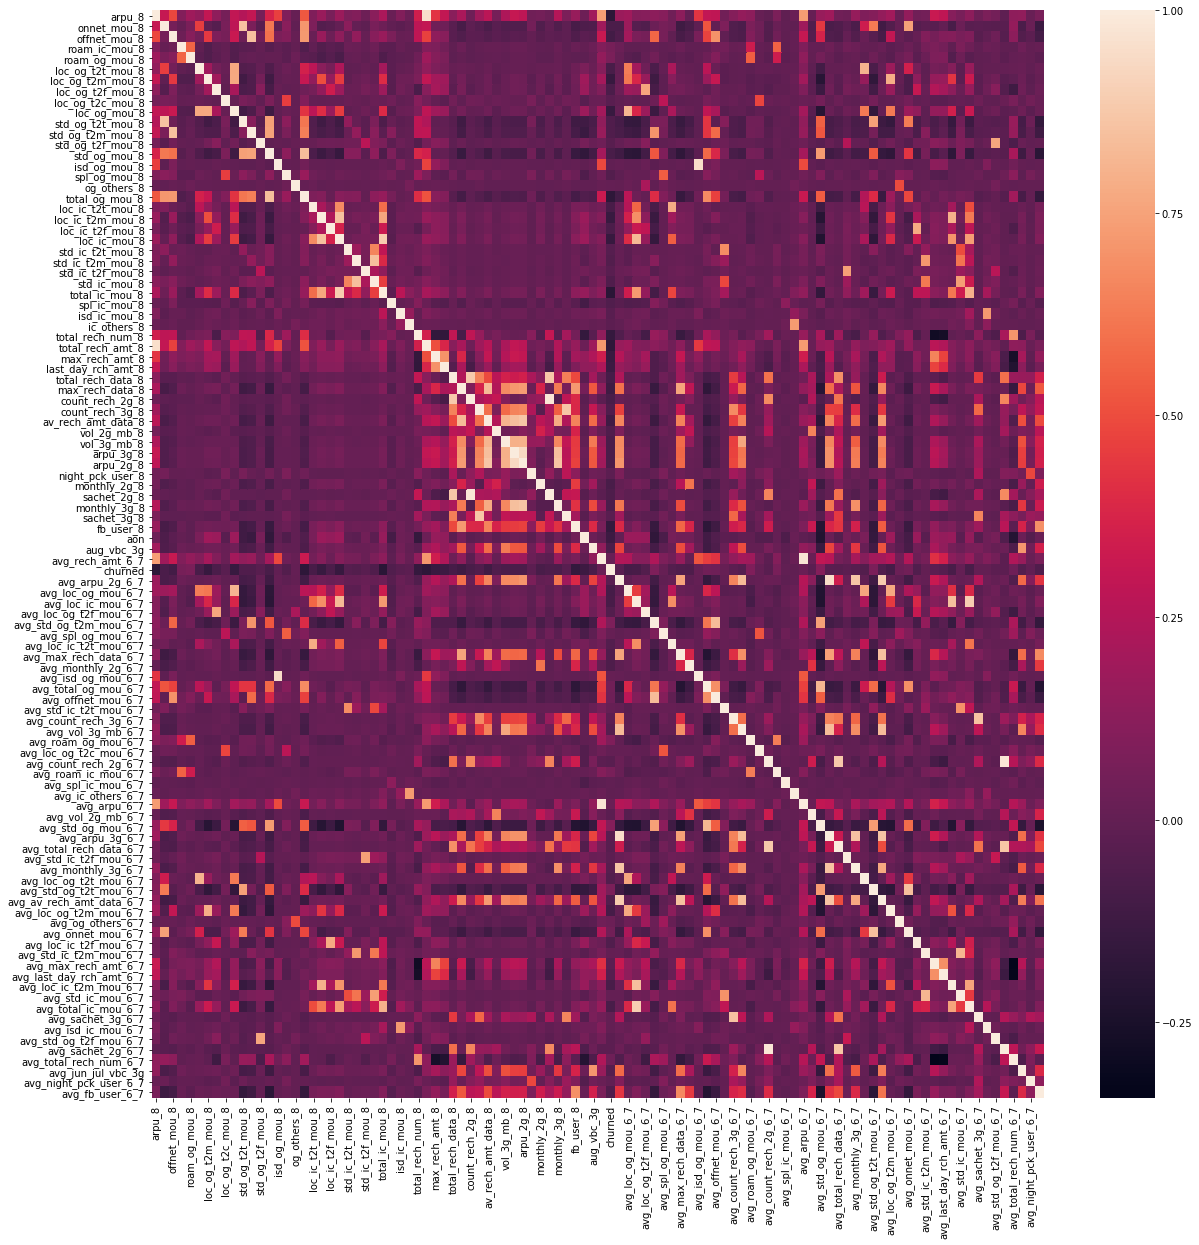

In [117]:
plt.figure(figsize=(20,20))
sns.heatmap(corr)

In [118]:
type(corr)

pandas.core.frame.DataFrame

In [119]:
corr.loc['churned',:]

arpu_8                     -0.180975
onnet_mou_8                -0.078882
offnet_mou_8               -0.105168
roam_ic_mou_8               0.061773
roam_og_mou_8               0.073240
loc_og_t2t_mou_8           -0.081843
loc_og_t2m_mou_8           -0.144030
loc_og_t2f_mou_8           -0.076294
loc_og_t2c_mou_8           -0.032640
loc_og_mou_8               -0.142954
std_og_t2t_mou_8           -0.063328
std_og_t2m_mou_8           -0.065082
std_og_t2f_mou_8           -0.037084
std_og_mou_8               -0.080927
isd_og_mou_8               -0.005646
spl_og_mou_8               -0.051357
og_others_8                 0.007207
total_og_mou_8             -0.177181
loc_ic_t2t_mou_8           -0.087784
loc_ic_t2m_mou_8           -0.139720
loc_ic_t2f_mou_8           -0.079861
loc_ic_mou_8               -0.148948
std_ic_t2t_mou_8           -0.041850
std_ic_t2m_mou_8           -0.053481
std_ic_t2f_mou_8           -0.032721
std_ic_mou_8               -0.062758
total_ic_mou_8             -0.191896
s

In [120]:
# As can be seen from the plot and the correlation values, Since this is an imbalanced dataset, not much can be interpreted.
# But some indicators like outgoing calls, aon, incoming calls from other mobile numbers seem to be highly negatively correlated

In [121]:
HTML(DataFrame(df_clean.describe(percentiles=[.25,.5,.75,.80,.85,.90,.95,.97,.99])).to_html())

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aon,aug_vbc_3g,avg_rech_amt_6_7,churned,avg_arpu_2g_6_7,avg_loc_og_mou_6_7,avg_loc_ic_mou_6_7,avg_loc_og_t2f_mou_6_7,avg_std_og_t2m_mou_6_7,avg_spl_og_mou_6_7,avg_loc_ic_t2t_mou_6_7,avg_max_rech_data_6_7,avg_monthly_2g_6_7,avg_isd_og_mou_6_7,avg_total_og_mou_6_7,avg_offnet_mou_6_7,avg_std_ic_t2t_mou_6_7,avg_count_rech_3g_6_7,avg_vol_3g_mb_6_7,avg_roam_og_mou_6_7,avg_loc_og_t2c_mou_6_7,avg_count_rech_2g_6_7,avg_roam_ic_mou_6_7,avg_spl_ic_mou_6_7,avg_ic_others_6_7,avg_arpu_6_7,avg_vol_2g_mb_6_7,avg_std_og_mou_6_7,avg_arpu_3g_6_7,avg_total_rech_data_6_7,avg_std_ic_t2f_mou_6_7,avg_monthly_3g_6_7,avg_loc_og_t2t_mou_6_7,avg_std_og_t2t_mou_6_7,avg_av_rech_amt_data_6_7,avg_loc_og_t2m_mou_6_7,avg_og_others_6_7,avg_onnet_mou_6_7,avg_loc_ic_t2f_mou_6_7,avg_std_ic_t2m_mou_6_7,avg_max_rech_amt_6_7,avg_last_day_rch_amt_6_7,avg_loc_ic_t2m_mou_6_7,avg_std_ic_mou_6_7,avg_total_ic_mou_6_7,avg_sachet_3g_6_7,avg_isd_ic_mou_6_7,avg_std_og_t2f_mou_6_7,avg_sachet_2g_6_7,avg_total_rech_num_6_7,avg_jun_jul_vbc_3g,avg_night_pck_user_6_7,avg_fb_user_6_7
count,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000
mean,536.099178,271.581552,383.727664,13.300841,21.540718,88.285493,170.905571,6.520666,1.715911,266.645263,172.946407,180.985515,1.795016,357.239076,2.036877,6.915327,0.059226,625.536310,66.917071,156.714236,14.796888,239.200376,15.110580,30.677164,2.689885,48.677169,295.901469,0.027629,11.703367,1.238706,10.240083,615.099220,163.136946,95.777625,1.035952,55.316239,0.721789,0.314163,89.893294,69.283248,270.344219,52.234577,47.928533,0.009340,0.114183,0.607606,0.173568,0.140595,0.328156,1264.394068,129.558401,697.880109,0.085596,50.950210,285.893348,247.686798,7.059940,209.321078,6.683982,69.924263,57.687042,0.128176,2.244721,700.022285,424.855569,16.615917,0.323838,268.107869,25.773424,1.718050,0.671275,15.523357,0.042411,1.336282,589.163362,78.515744,407.658098,54.863291,0.995113,2.943728,0.179309,95.790887,195.548914,94.018352,182.731369,0.371013,302.291846,16.100264,32.901592,173.550765,104.861

In [122]:
from scipy import stats
len(df_clean[(np.abs(stats.zscore(df_clean)) < 3).all(axis=1)].index)/len(df_clean.index)

0.5006862384092658

In [123]:
stats.zscore(df_clean)

array([[ 5.34743661, -0.47080185, -0.12196333, ..., -0.2981001 ,
        -0.12547089, -0.83183296],
       [-0.8090754 , -0.50775037, -0.52155597, ...,  1.05944831,
        -0.12547089,  1.20216443],
       [ 0.11598471,  0.56390718,  0.20827068, ..., -0.3501261 ,
        -0.12547089, -0.83183296],
       ...,
       [-0.33496936, -0.5802734 , -0.04882878, ..., -0.3501261 ,
        -0.12547089, -0.83183296],
       [ 0.05729112,  1.08168035,  0.44659606, ...,  1.29138165,
        -0.12547089,  1.20216443],
       [-0.27193757, -0.57778297, -0.28561426, ..., -0.3501261 ,
        -0.12547089,  1.20216443]])

In [124]:
(stats.zscore(df_clean['aon'])).max()

3.1339592960092135

In [125]:
col_max_z_score = []
for col in cols_independent:
    z_score = {col:(stats.zscore(df_clean[col])).max()}
    col_max_z_score.append(z_score)

In [126]:
col_max_z_score

[{'arpu_8': 66.97538559060408},
 {'onnet_mou_8': 22.501842607704354},
 {'offnet_mou_8': 28.73829502522826},
 {'roam_ic_mou_8': 55.6332209744654},
 {'roam_og_mou_8': 49.92508481721668},
 {'loc_og_t2t_mou_8': 45.410556942777596},
 {'loc_og_t2m_mou_8': 20.507967281188268},
 {'loc_og_t2f_mou_8': 45.514293839725035},
 {'loc_og_t2c_mou_8': 47.262116539650414},
 {'loc_og_mou_8': 29.553597482467175},
 {'std_og_t2t_mou_8': 19.096899650754747},
 {'std_og_t2m_mou_8': 33.00323205654709},
 {'std_og_t2f_mou_8': 43.93859301302391},
 {'std_og_mou_8': 22.11875237256347},
 {'isd_og_mou_8': 126.50267665154445},
 {'spl_og_mou_8': 60.38125481744794},
 {'og_others_8': 118.65590798775665},
 {'total_og_mou_8': 19.538347711052225},
 {'loc_ic_t2t_mou_8': 25.286034388579445},
 {'loc_ic_t2m_mou_8': 25.863903371536892},
 {'loc_ic_t2f_mou_8': 35.96608152111887},
 {'loc_ic_mou_8': 18.068182906775032},
 {'std_ic_t2t_mou_8': 59.17065123634847},
 {'std_ic_t2m_mou_8': 53.25680929424492},
 {'std_ic_t2f_mou_8': 68.5324633

In [127]:
HTML(DataFrame(df_clean.describe()).to_html())

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aon,aug_vbc_3g,avg_rech_amt_6_7,churned,avg_arpu_2g_6_7,avg_loc_og_mou_6_7,avg_loc_ic_mou_6_7,avg_loc_og_t2f_mou_6_7,avg_std_og_t2m_mou_6_7,avg_spl_og_mou_6_7,avg_loc_ic_t2t_mou_6_7,avg_max_rech_data_6_7,avg_monthly_2g_6_7,avg_isd_og_mou_6_7,avg_total_og_mou_6_7,avg_offnet_mou_6_7,avg_std_ic_t2t_mou_6_7,avg_count_rech_3g_6_7,avg_vol_3g_mb_6_7,avg_roam_og_mou_6_7,avg_loc_og_t2c_mou_6_7,avg_count_rech_2g_6_7,avg_roam_ic_mou_6_7,avg_spl_ic_mou_6_7,avg_ic_others_6_7,avg_arpu_6_7,avg_vol_2g_mb_6_7,avg_std_og_mou_6_7,avg_arpu_3g_6_7,avg_total_rech_data_6_7,avg_std_ic_t2f_mou_6_7,avg_monthly_3g_6_7,avg_loc_og_t2t_mou_6_7,avg_std_og_t2t_mou_6_7,avg_av_rech_amt_data_6_7,avg_loc_og_t2m_mou_6_7,avg_og_others_6_7,avg_onnet_mou_6_7,avg_loc_ic_t2f_mou_6_7,avg_std_ic_t2m_mou_6_7,avg_max_rech_amt_6_7,avg_last_day_rch_amt_6_7,avg_loc_ic_t2m_mou_6_7,avg_std_ic_mou_6_7,avg_total_ic_mou_6_7,avg_sachet_3g_6_7,avg_isd_ic_mou_6_7,avg_std_og_t2f_mou_6_7,avg_sachet_2g_6_7,avg_total_rech_num_6_7,avg_jun_jul_vbc_3g,avg_night_pck_user_6_7,avg_fb_user_6_7
count,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000
mean,536.099178,271.581552,383.727664,13.300841,21.540718,88.285493,170.905571,6.520666,1.715911,266.645263,172.946407,180.985515,1.795016,357.239076,2.036877,6.915327,0.059226,625.536310,66.917071,156.714236,14.796888,239.200376,15.110580,30.677164,2.689885,48.677169,295.901469,0.027629,11.703367,1.238706,10.240083,615.099220,163.136946,95.777625,1.035952,55.316239,0.721789,0.314163,89.893294,69.283248,270.344219,52.234577,47.928533,0.009340,0.114183,0.607606,0.173568,0.140595,0.328156,1264.394068,129.558401,697.880109,0.085596,50.950210,285.893348,247.686798,7.059940,209.321078,6.683982,69.924263,57.687042,0.128176,2.244721,700.022285,424.855569,16.615917,0.323838,268.107869,25.773424,1.718050,0.671275,15.523357,0.042411,1.336282,589.163362,78.515744,407.658098,54.863291,0.995113,2.943728,0.179309,95.790887,195.548914,94.018352,182.731369,0.371013,302.291846,16.100264,32.901592,173.550765,104.861

In [128]:
# As we can see that there are a large number of outliers and imputing them is impossible, it is best to bin the variables
# We create four bins based on the quartile logic of q1, q2 , q3, q4

In [129]:
df_binned = pd.DataFrame()

In [130]:
def binner(x,q1,q2,q3):
    iqr = q3 -q1
    min = q1 - 1.5*iqr
    max = q3 + 1.5 * iqr
    if (x < min):
        return 'Negative Outlier'
    elif (x > max):
        return 'Positivie Outlier'
    else:
        return 'Normal Value'

In [131]:
for col in cols_independent:
    col_name = col + '_binned'
    q1 = df_clean[col].quantile(0.25)
    q2 = df_clean[col].quantile(0.50)
    q3 = df_clean[col].quantile(0.75)
    df_binned[col_name] = df_clean[col].apply(binner,args=(q1,q2,q3))

In [132]:
df_binned.head()

,arpu_8_binned,onnet_mou_8_binned,offnet_mou_8_binned,roam_ic_mou_8_binned,roam_og_mou_8_binned,loc_og_t2t_mou_8_binned,loc_og_t2m_mou_8_binned,loc_og_t2f_mou_8_binned,loc_og_t2c_mou_8_binned,loc_og_mou_8_binned,...,avg_std_ic_mou_6_7_binned,avg_total_ic_mou_6_7_binned,avg_sachet_3g_6_7_binned,avg_isd_ic_mou_6_7_binned,avg_std_og_t2f_mou_6_7_binned,avg_sachet_2g_6_7_binned,avg_total_rech_num_6_7_binned,avg_jun_jul_vbc_3g_binned,avg_night_pck_user_6_7_binned,avg_fb_user_6_7_binned
0,Positivie Outlier,Normal Value,Normal Value,Positivie Outlier,Positivie Outlier,Normal Value,Normal Value,Positivie Outlier,Normal Value,Normal Value,...,Positivie Outlier,Normal Value,Normal Value,Positivie Outlier,Positivie Outlier,Normal Value,Normal Value,Normal Value,Normal Value,Normal Value
1,Normal Value,Normal Value,Normal Value,Normal Value,Normal Value,Normal Value,Normal Value,Normal Value,Positivie Outlier,Normal Value,...,Normal Value,Normal Value,Normal Value,Normal Value,Normal Value,Positivie Outlier,Normal Value,Positivie Outlier,Normal Value,Normal Value
2,Normal Value,Normal Value,Normal Value,Positivie Outlier,Positivie Outlier,Normal Value,Normal Value,Positivie Outlier,Positivie Outlier,Normal Value,...,Positivie Outlier,Normal Value,Normal Value,Positivie Outlier,Normal Value,Normal Value,Normal Value,Normal Value,Normal Value,Normal Value
3,Normal Value,Normal Value,Normal Value,Normal Value,Normal Value,Normal Value,Normal Value,Normal Value,Normal Value,Normal Value,...,Positivie Outlier,Normal Value,Normal Value,Normal Value,Normal Value,Normal Value,Normal Value,Normal Value,Normal Value,Normal Value
4,Normal Value,Normal Value,Normal Value,Positivie Outlier,Positivie Outlier,Normal Value,Normal Value,Normal Value,Normal Value,Normal Value,...,Normal Value,Normal Value,Normal Value,Normal Value,Normal Value,Normal Value,Normal Value,Normal Value,Normal Value,Normal Value


In [133]:
for col in df_binned.columns:
    print(df_binned[col].value_counts()/len(df_binned[col].index))

Normal Value         0.947779
Positivie Outlier    0.052154
Negative Outlier     0.000067
Name: arpu_8_binned, dtype: float64
Normal Value         0.894018
Positivie Outlier    0.105982
Name: onnet_mou_8_binned, dtype: float64
Normal Value         0.932849
Positivie Outlier    0.067151
Name: offnet_mou_8_binned, dtype: float64
Normal Value         0.801359
Positivie Outlier    0.198641
Name: roam_ic_mou_8_binned, dtype: float64
Normal Value         0.800656
Positivie Outlier    0.199344
Name: roam_og_mou_8_binned, dtype: float64
Normal Value         0.902286
Positivie Outlier    0.097714
Name: loc_og_t2t_mou_8_binned, dtype: float64
Normal Value         0.934355
Positivie Outlier    0.065645
Name: loc_og_t2m_mou_8_binned, dtype: float64
Normal Value         0.859472
Positivie Outlier    0.140528
Name: loc_og_t2f_mou_8_binned, dtype: float64
Normal Value         0.758545
Positivie Outlier    0.241455
Name: loc_og_t2c_mou_8_binned, dtype: float64
Normal Value         0.936799
Positivie O

In [134]:
len(df_binned.columns)

101

As we can see some columns have as high as 24% outlier values. Also there are no negative outliers. Thus for the sake of EDAs, lets bin the values

In [135]:
def binner_quartiles(x,q1,q2,q3):
    iqr = q3 -q1
    min = q1 - 1.5*iqr
    max = q3 + 1.5 * iqr
    if (x > min) & (x <= q1 ):
        return 'Low'
    elif (x > q1) & (x <= q2):
        return 'Mid'
    elif (x > q2) & (x <= q3):
        return 'High'
    else:
        return 'Very High'

In [136]:
df_binned.drop(df_binned.columns,axis=1,inplace=True)

In [137]:
for col in cols_independent:
    col_name = col + '_binned'
    q1 = df_clean[col].quantile(0.25)
    q2 = df_clean[col].quantile(0.50)
    q3 = df_clean[col].quantile(0.75)
    df_binned[col_name] = df_clean[col].apply(binner_quartiles,args=(q1,q2,q3))

In [138]:
df_binned.head()

,arpu_8_binned,onnet_mou_8_binned,offnet_mou_8_binned,roam_ic_mou_8_binned,roam_og_mou_8_binned,loc_og_t2t_mou_8_binned,loc_og_t2m_mou_8_binned,loc_og_t2f_mou_8_binned,loc_og_t2c_mou_8_binned,loc_og_mou_8_binned,...,avg_std_ic_mou_6_7_binned,avg_total_ic_mou_6_7_binned,avg_sachet_3g_6_7_binned,avg_isd_ic_mou_6_7_binned,avg_std_og_t2f_mou_6_7_binned,avg_sachet_2g_6_7_binned,avg_total_rech_num_6_7_binned,avg_jun_jul_vbc_3g_binned,avg_night_pck_user_6_7_binned,avg_fb_user_6_7_binned
0,Very High,Mid,High,Very High,Very High,High,High,Very High,Low,High,...,Very High,Very High,Very High,Very High,Very High,Very High,Low,High,Very High,Low
1,Low,Mid,Mid,Very High,Very High,Mid,Mid,Low,Very High,Mid,...,Mid,Low,Very High,Low,Very High,Very High,Very High,Very High,Very High,High
2,High,Very High,High,Very High,Very High,High,Very High,Very High,Very High,Very High,...,Very High,Very High,Very High,Very High,Very High,Very High,Low,Low,Very High,Low
3,Low,Mid,Mid,Very High,Very High,High,High,Very High,Low,High,...,Very High,High,Very High,Low,Very High,Very High,Mid,High,Very High,Low
4,Low,Low,Low,Very High,Very High,Low,Low,Low,Low,Low,...,Low,Low,Very High,Low,Very High,Very High,High,Low,Very High,Low


In [139]:
df_binned['churned'] = df_clean['churned']

In [140]:
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='churned', data=df_binned)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


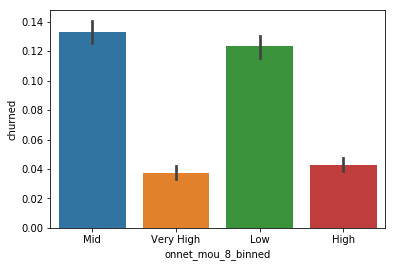

In [141]:
plot_cat(df_binned['onnet_mou_8_binned'])

In [142]:
import warnings
warnings.filterwarnings('ignore')

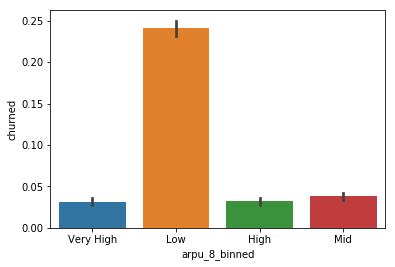

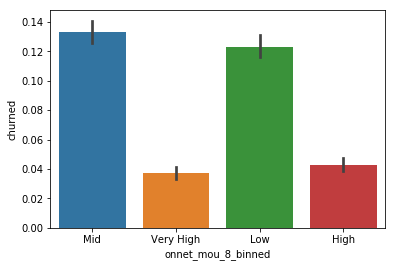

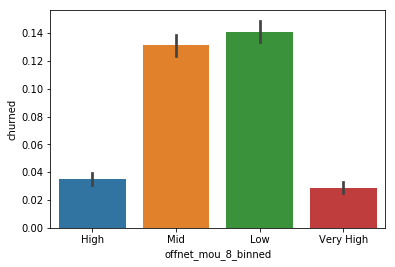

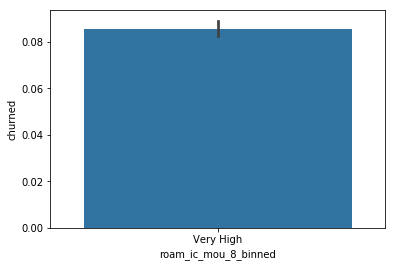

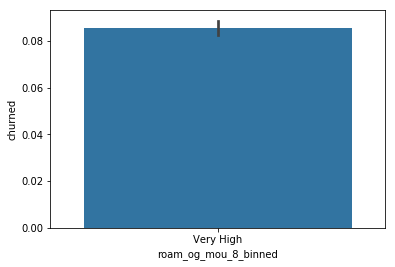

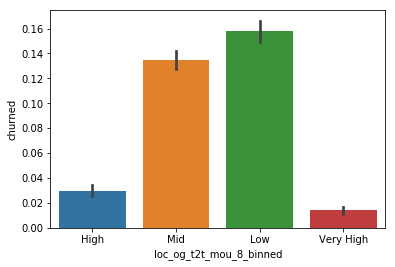

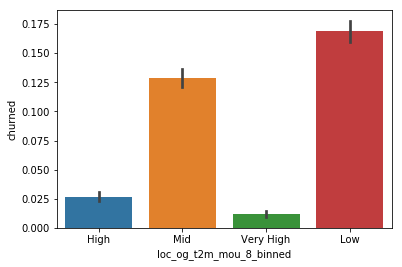

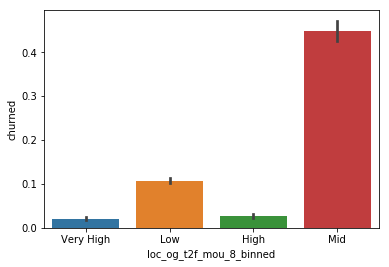

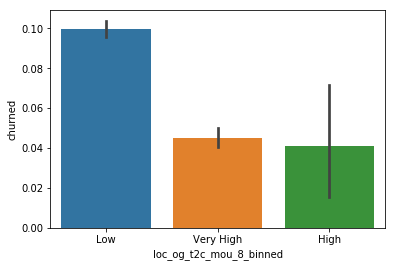

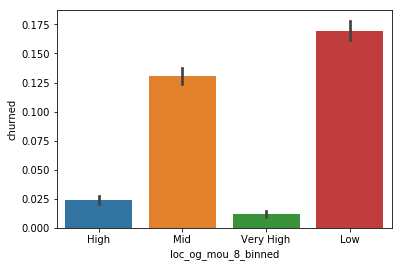

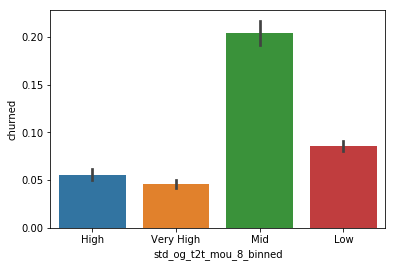

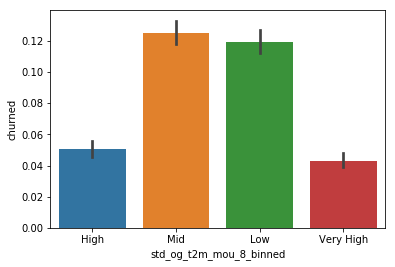

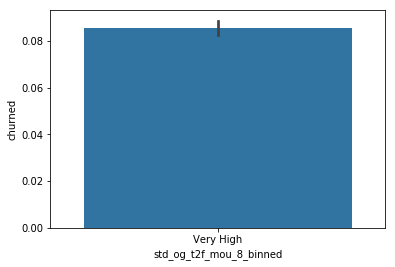

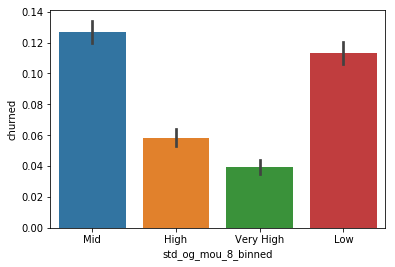

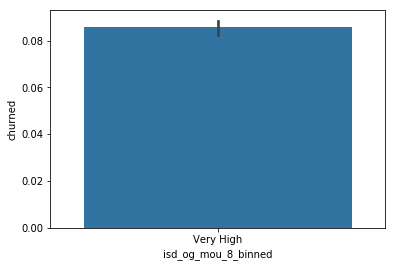

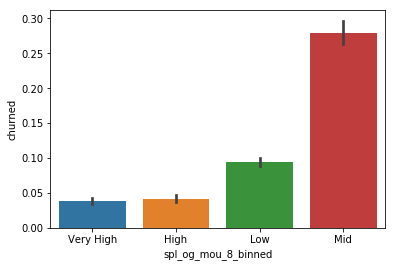

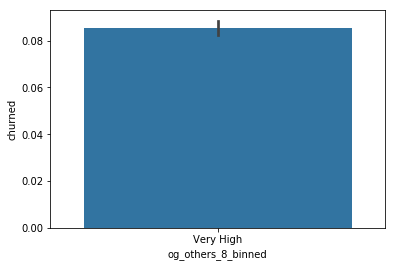

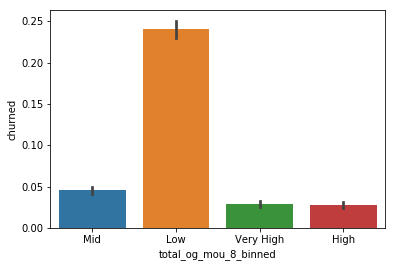

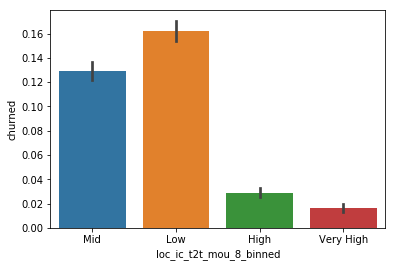

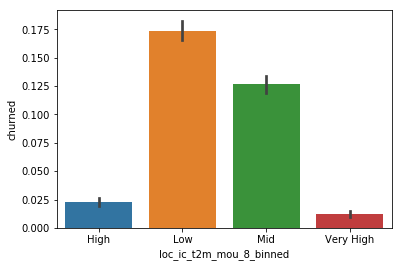

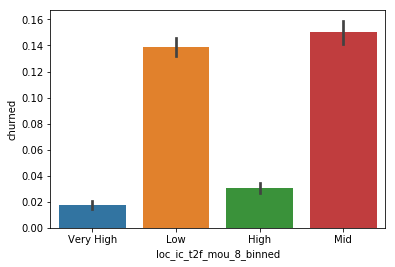

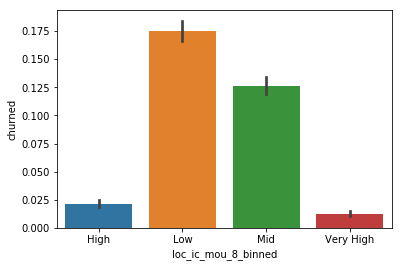

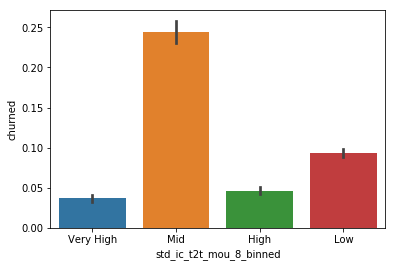

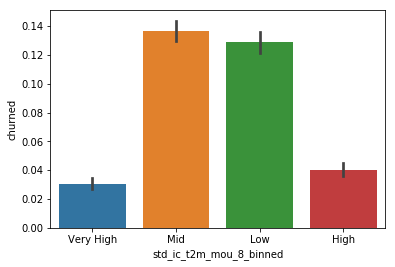

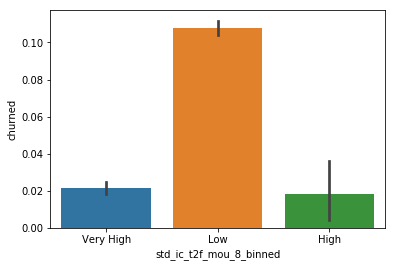

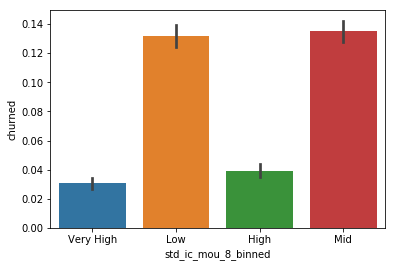

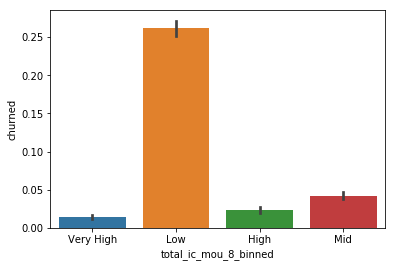

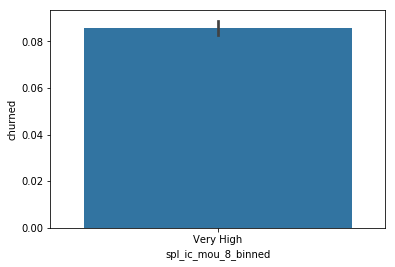

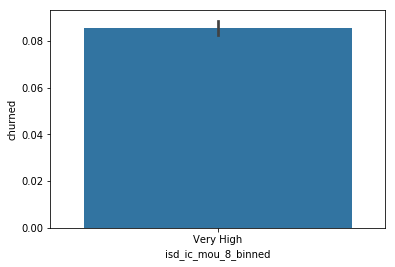

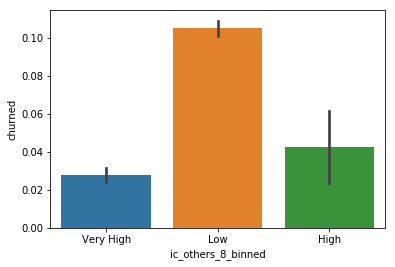

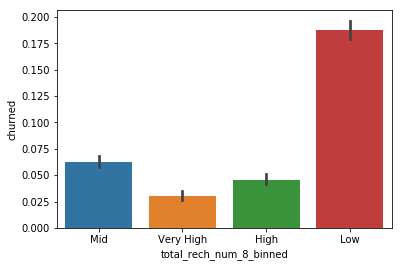

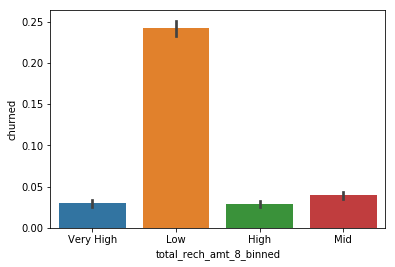

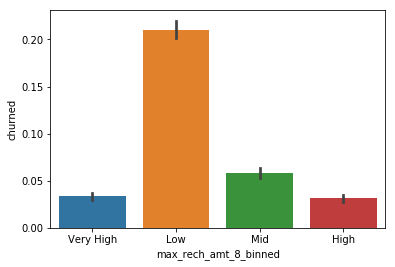

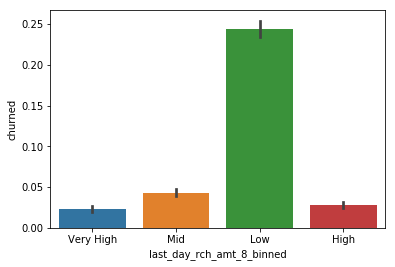

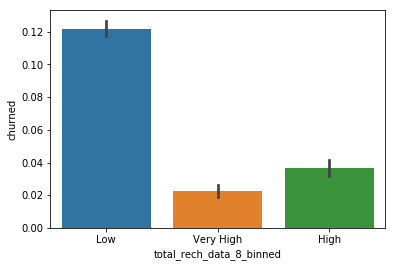

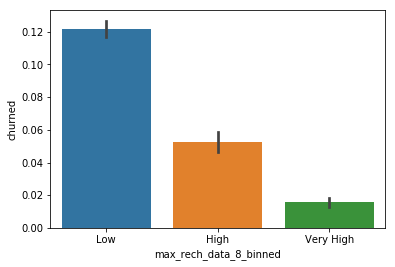

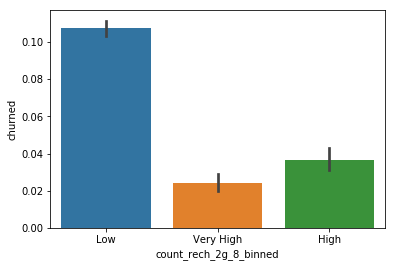

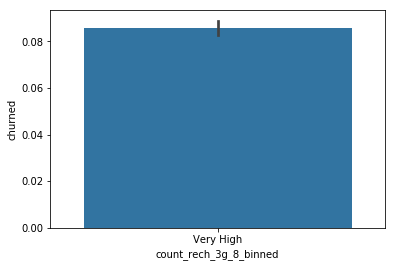

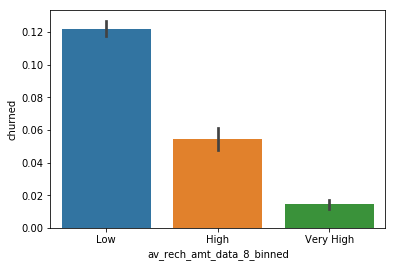

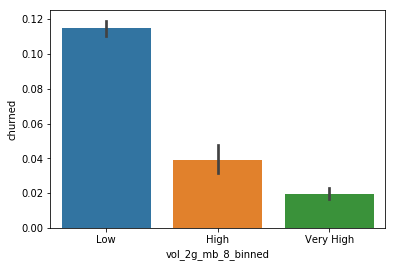

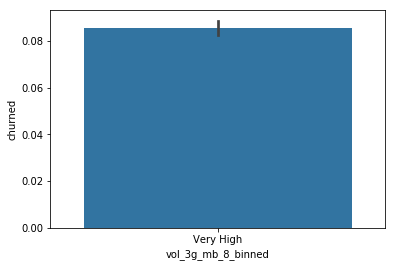

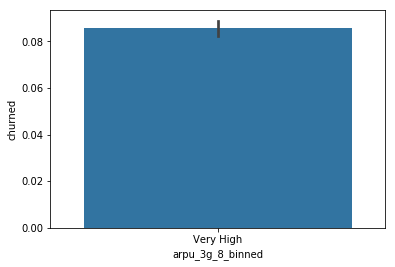

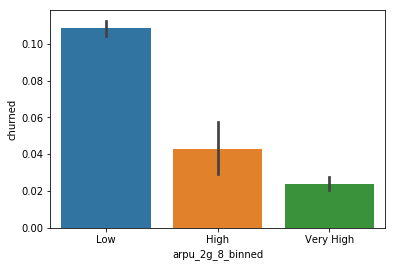

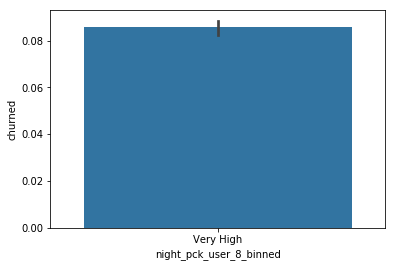

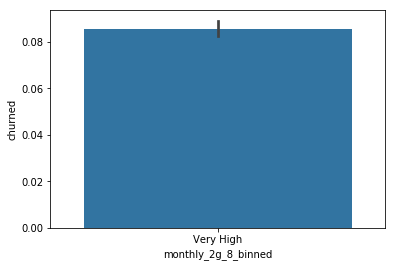

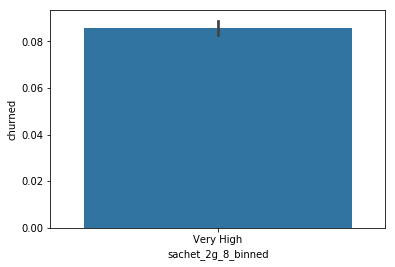

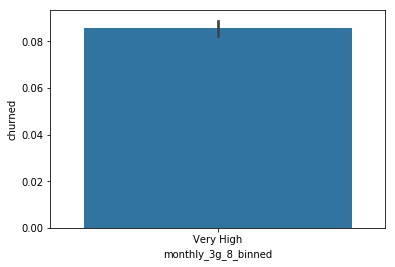

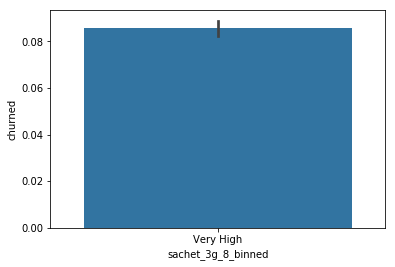

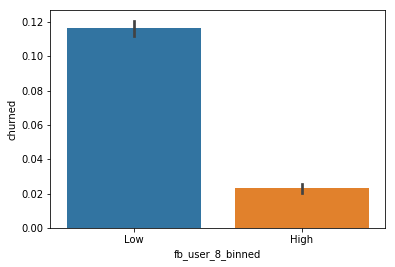

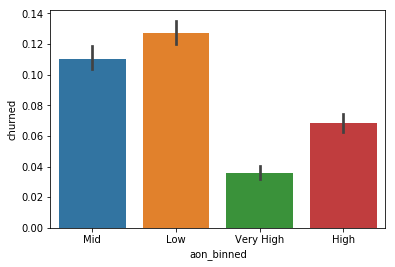

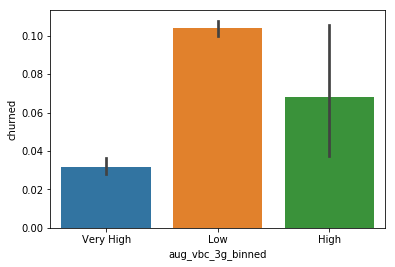

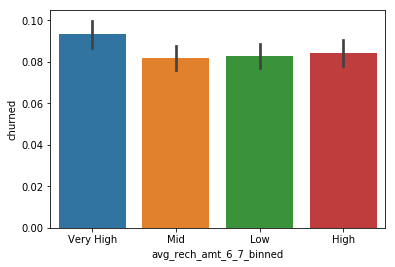

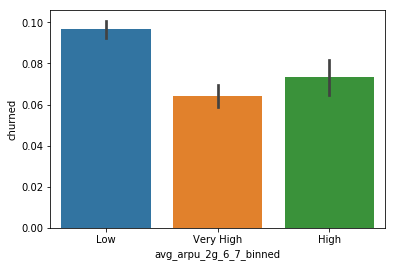

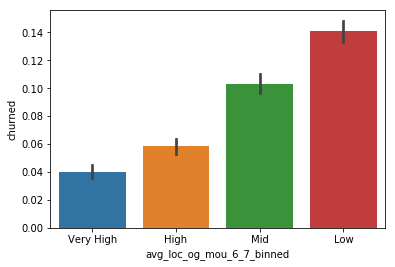

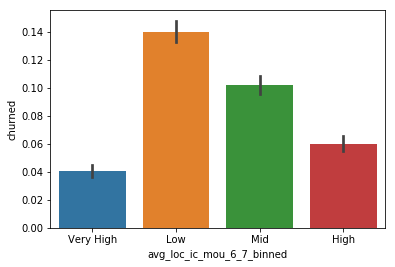

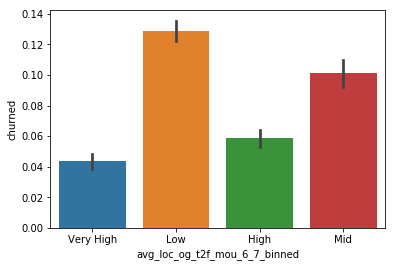

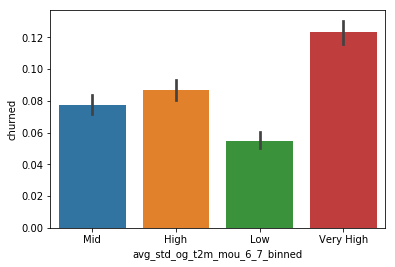

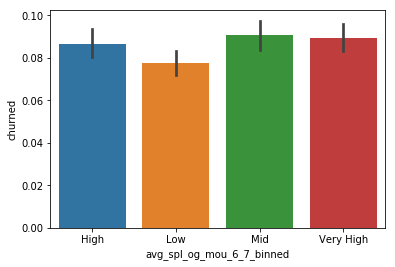

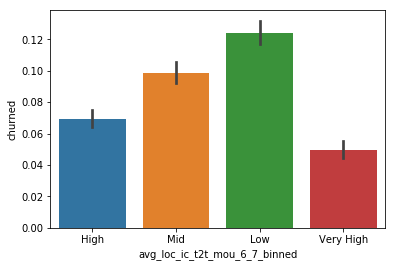

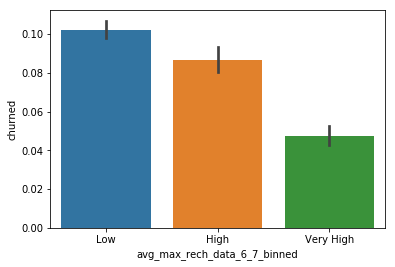

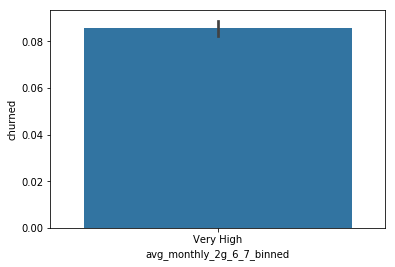

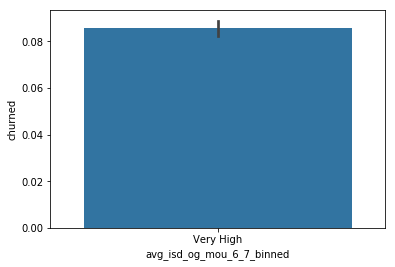

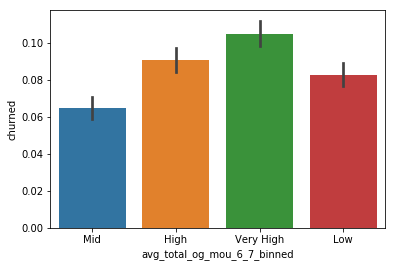

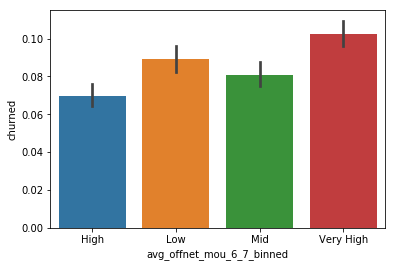

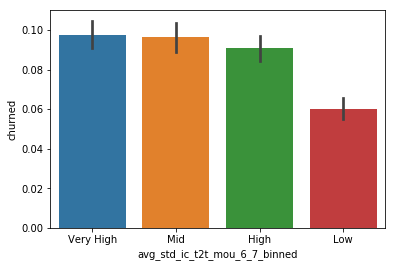

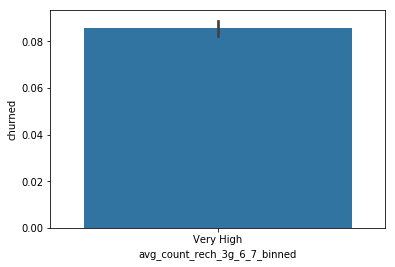

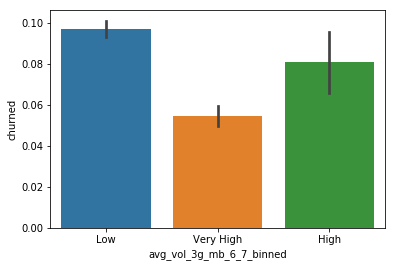

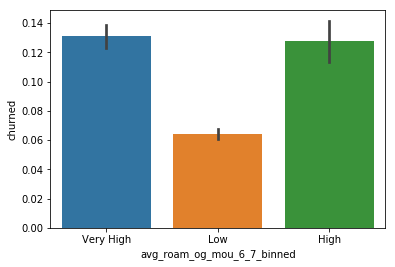

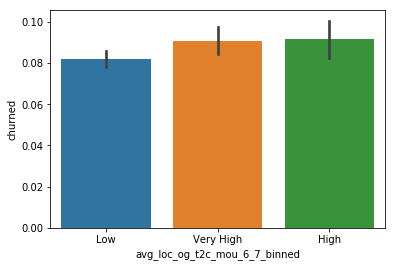

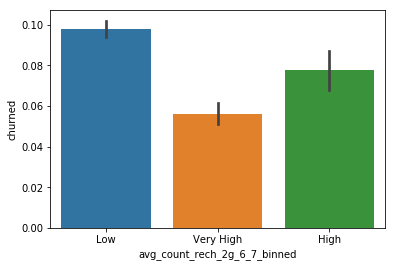

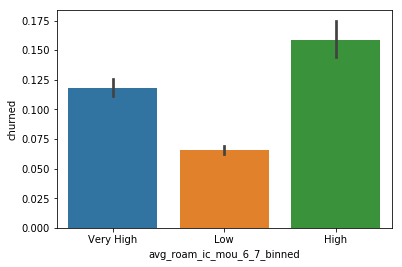

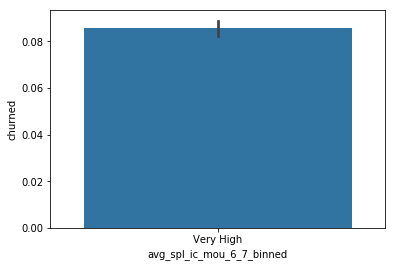

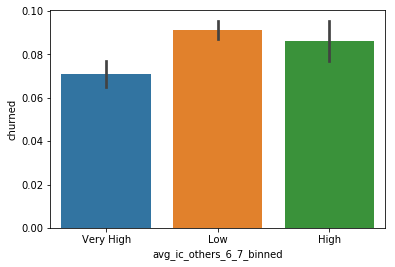

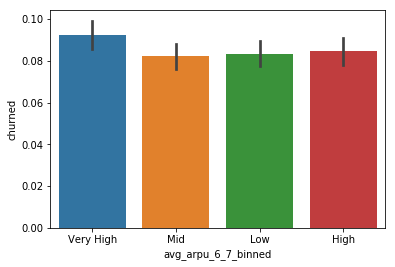

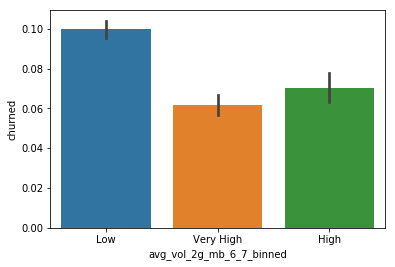

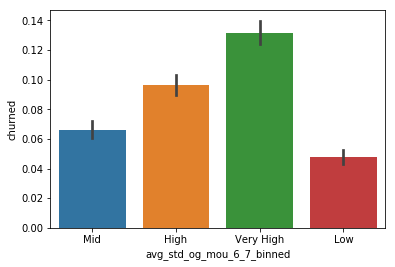

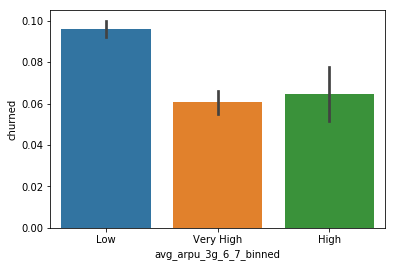

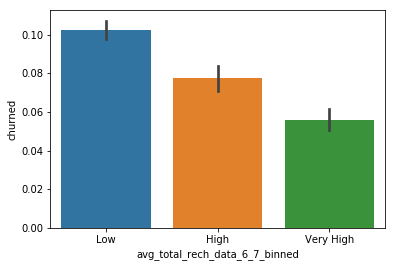

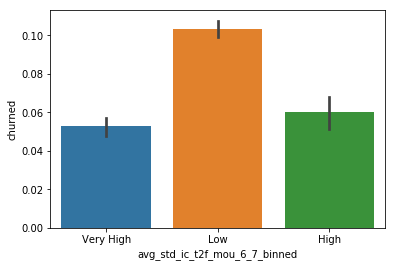

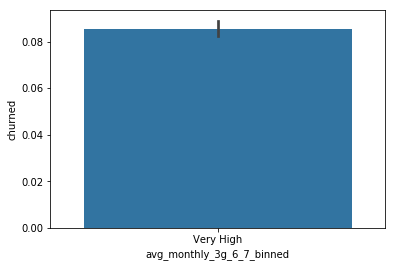

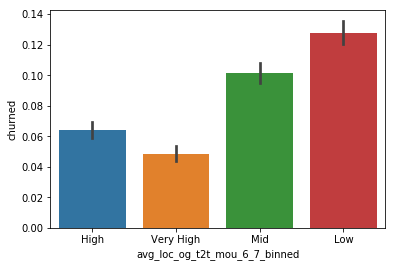

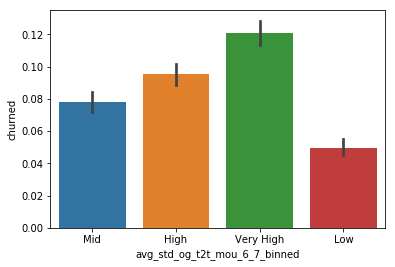

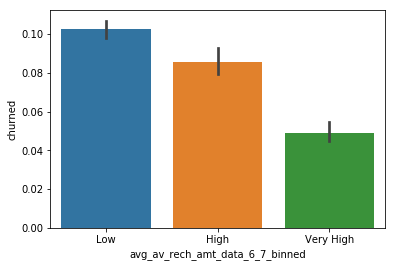

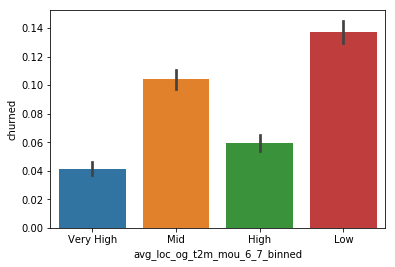

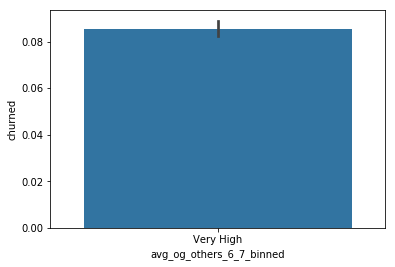

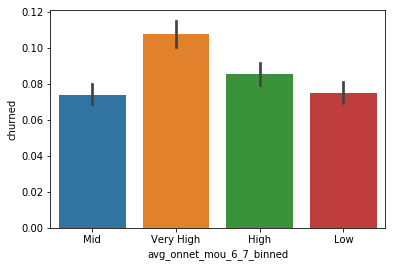

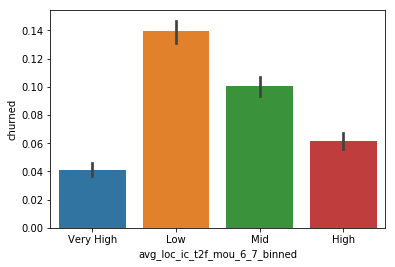

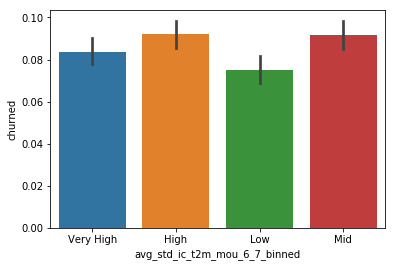

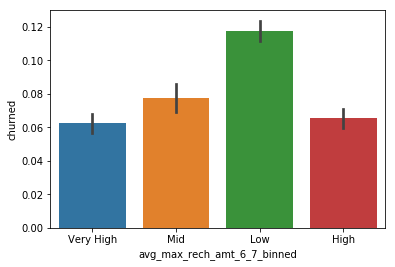

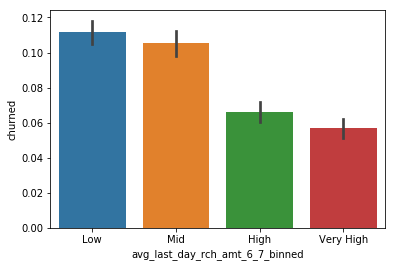

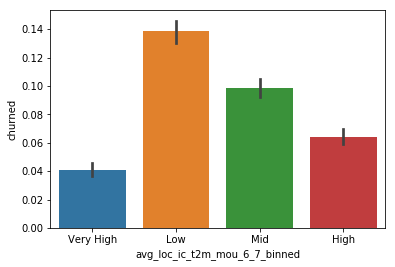

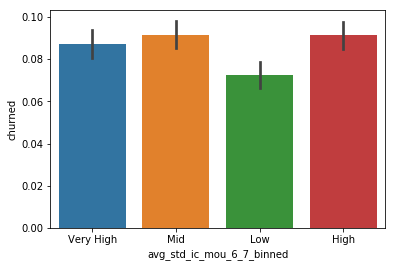

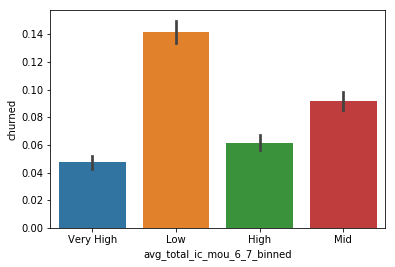

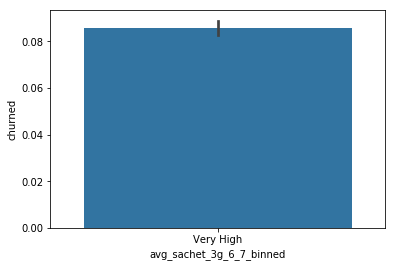

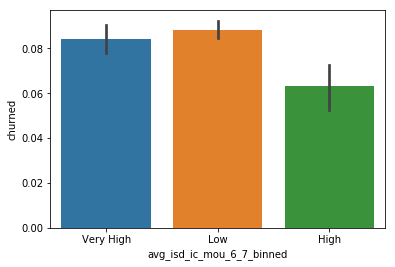

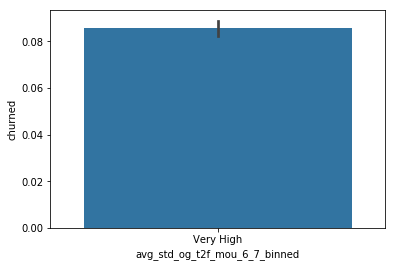

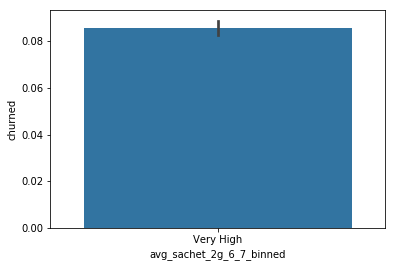

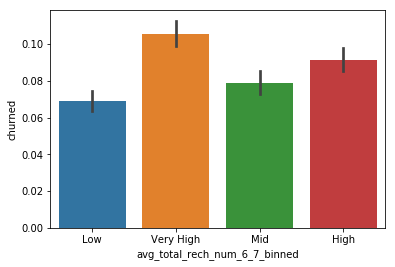

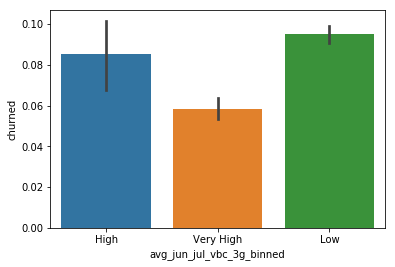

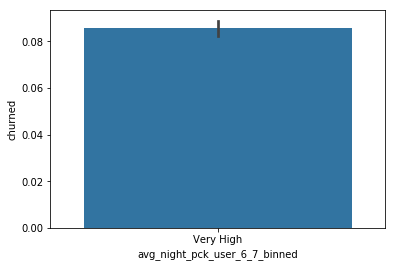

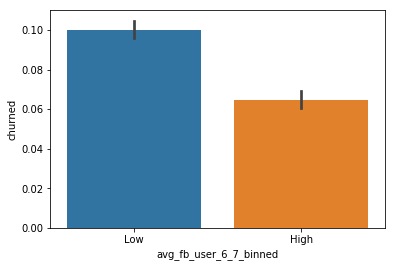

In [143]:
for col in df_binned.drop('churned',axis=1).columns:
    plot_cat(df_binned[col])

As can be seen from the plots above, Majority of the churnings are for customers in the low to mid range. Also, we can treat outliers which are positive ones and give them a value which is 85 percentile of the max value and further apply our logistic regression models to find the base models

In [144]:
for col in cols_independent:
    percentile_85 = df_clean[col].quantile(0.85)
    df_clean.loc[(df_clean[col] > percentile_85),col] = percentile_85

In [145]:
HTML(DataFrame(df_clean.describe(percentiles=[.25,.5,.75,.80,.85,.90,.95])).to_html())

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aon,aug_vbc_3g,avg_rech_amt_6_7,churned,avg_arpu_2g_6_7,avg_loc_og_mou_6_7,avg_loc_ic_mou_6_7,avg_loc_og_t2f_mou_6_7,avg_std_og_t2m_mou_6_7,avg_spl_og_mou_6_7,avg_loc_ic_t2t_mou_6_7,avg_max_rech_data_6_7,avg_monthly_2g_6_7,avg_isd_og_mou_6_7,avg_total_og_mou_6_7,avg_offnet_mou_6_7,avg_std_ic_t2t_mou_6_7,avg_count_rech_3g_6_7,avg_vol_3g_mb_6_7,avg_roam_og_mou_6_7,avg_loc_og_t2c_mou_6_7,avg_count_rech_2g_6_7,avg_roam_ic_mou_6_7,avg_spl_ic_mou_6_7,avg_ic_others_6_7,avg_arpu_6_7,avg_vol_2g_mb_6_7,avg_std_og_mou_6_7,avg_arpu_3g_6_7,avg_total_rech_data_6_7,avg_std_ic_t2f_mou_6_7,avg_monthly_3g_6_7,avg_loc_og_t2t_mou_6_7,avg_std_og_t2t_mou_6_7,avg_av_rech_amt_data_6_7,avg_loc_og_t2m_mou_6_7,avg_og_others_6_7,avg_onnet_mou_6_7,avg_loc_ic_t2f_mou_6_7,avg_std_ic_t2m_mou_6_7,avg_max_rech_amt_6_7,avg_last_day_rch_amt_6_7,avg_loc_ic_t2m_mou_6_7,avg_std_ic_mou_6_7,avg_total_ic_mou_6_7,avg_sachet_3g_6_7,avg_isd_ic_mou_6_7,avg_std_og_t2f_mou_6_7,avg_sachet_2g_6_7,avg_total_rech_num_6_7,avg_jun_jul_vbc_3g,avg_night_pck_user_6_7,avg_fb_user_6_7
count,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.0,29873.000000,29873.0,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.0,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.0,29873.0,29873.000000,29873.0,29873.0,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.0,29873.00000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.0,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.0,29873.000000
mean,470.181393,183.214635,303.966353,0.938876,1.801992,50.398546,131.326152,2.831965,0.397580,206.147670,87.229447,100.038758,0.016701,251.912332,0.0,3.489605,0.0,516.701781,42.048118,120.297196,6.916797,187.354695,5.253620,14.646556,0.338265,25.304729,235.208848,0.0,0.847052,0.098823,8.619958,537.829210,135.952700,70.829043,0.591002,40.343153,0.286379,0.163425,57.501257,13.089533,101.951810,13.160057,14.127083,0.0,0.0,0.202859,0.0,0.0,0.328156,1187.684364,42.729611,629.648512,0.085596,22.759678,225.711946,197.679031,3.322013,135.740371,3.874662,45.277985,44.854969,0.077445,0.0,603.17210,351.788229,6.856826,0.114401,117.618668,6.787533,0.680206,0.370619,3.213094,0.021800,0.206245,531.372079,24.211883,318.462617,21.506772,0.616627,0.575731,0.080056,56.131986,124.002656,66.536448,144.623156,0.130918,226.701765,7.904478,17.297459,145.712868,83.808623,125.787637,29.724957,254.092200,0.0,1.550318,0.213734,0.200967,10.648177,48.082897,0.0,0.408965
std,2

Finally writting the results in the outlier csv file to be processed for our first model

In [146]:
df_clean.to_csv('./telecom_churn_final_clean_dataset_after_outlier_treatment.csv',index=False)

Lets start with Logistic Regression to have a look at the indicator variables

In [147]:
df_logit = pd.read_csv('./telecom_churn_final_clean_dataset_after_outlier_treatment.csv')

In [148]:
df_logit.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,...,avg_std_ic_mou_6_7,avg_total_ic_mou_6_7,avg_sachet_3g_6_7,avg_isd_ic_mou_6_7,avg_std_og_t2f_mou_6_7,avg_sachet_2g_6_7,avg_total_rech_num_6_7,avg_jun_jul_vbc_3g,avg_night_pck_user_6_7,avg_fb_user_6_7
0,840.7954,52.290,325.91,5.50,10.594,40.28,162.28,10.832,0.000,255.79,...,81.886,548.671,0.0,7.857,1.14,0.0,5.0,19.060,0.0,0.0
1,137.3620,35.080,136.48,0.00,0.000,12.49,50.54,0.000,2.102,63.04,...,13.545,66.175,0.0,0.000,0.00,0.5,19.0,240.725,0.0,1.0
2,593.2600,524.582,482.46,5.50,1.440,36.01,294.46,10.832,0.490,353.99,...,81.886,548.671,0.0,7.857,0.00,0.0,5.0,0.000,0.0,0.0
3,187.8940,70.610,162.76,0.00,0.000,67.38,128.28,10.260,0.000,205.93,...,81.886,373.210,0.0,0.000,0.00,0.0,8.0,12.170,0.0,0.0
4,25.4990,7.790,5.54,4.81,10.594,0.00,0.00,0.000,0.000,0.00,...,4.955,47.095,0.0,0.000,0.00,0.0,10.5,0.000,0.0,0.0


In [149]:
X = df_logit.drop('churned',axis=1)
y = df_logit['churned']

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [152]:
import statsmodels.api as sm

In [153]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                churned   No. Observations:                20911
Model:                            GLM   Df Residuals:                    20819
Model Family:                Binomial   Df Model:                           91
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3525.0
Date:                Sun, 18 Nov 2018   Deviance:                       7050.0
Time:                        01:45:33   Pearson chi2:                 3.08e+04
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.2914      0.191     -6.757      0.000      -1.666      -0.917
arpu_8                      -0.0006      0.000     -1.322      0.186      -0.001       0.000
onnet_mou_8                  0.0005      0.001      0.658      0.511      -0.001       0.002
offnet_mou_8                 0.0006      0.000      1.216      0.224      -0.000       0.002
roam_ic_mou_8                0.0539      0.026      2.090      0.037       0.003       0.104
roam_og_mou_8                0.1150      0.013      8.677      0.000       0.089       0.141
loc_og_t2t_mou_8            -0.0085      0.003     -3.340      0.001      -0.013      -0.003
loc_og_t2m_mou_8            -0.0032      0.002     -1.896      0.058      -0.007       0.000
loc_og_t2f_mou_8            -0.0196      0.017     -1.146      0.252      -0.053       0.014
loc_og_t2c_mou_8            -0.0305      0.057     -0.535      0.592      -0.142       0.081
loc_og_mou_8                 0.0060      0.001      4.011      0.000       0.003       0.009
std_og_t2t_mou_8            -0.0024      0.001     -2.396      0.017      -0.004      -0.000
std_og_t2m_mou_8            -0.0018      0.001     -2.112      0.035      -0.003      -0.000
std_og_t2f_mou_8            -4.2205      1.492     -2.829      0.005      -7.145      -1.296
std_og_mou_8                 0.0042      0.001      5.762      0.000       0.003       0.006
isd_og_mou_8             -7.241e-13   2.57e-13     -2.822      0.005   -1.23e-12   -2.21e-13
spl_og_mou_8                 0.0155      0.011      1.410      0.158      -0.006       0.037
og_others_8                5.37e-13   2.02e-13      2.664      0.008    1.42e-13    9.32e-13
total_og_mou_8              -0.0035      0.001     -6.494      0.000      -0.004      -0.002
loc_ic_t2t_mou_8            -0.0053      0.003     -1.887      0.059      -0.011       0.000
loc_ic_t2m_mou_8            -0.0071      0.002     -3.882      0.000      -0.011      -0.003
loc_ic_t2f_mou_8            -0.0169      0.008     -2.015      0.044      -0.033      -0.000
loc_ic_mou_8                 0.0121      0.002      6.615      0.000       0.009       0.016
std_ic_t2t_mou_8            -0.0250      0.010     -2.580      0.010      -0.044      -0.006
std_ic_t2m_mou_8            -0.0192      0.006     -3.159      0.002      -0.031      -0.007
std_ic_t2f_mou_8            -0.2418      0.091     -2.665      0.008      -0.420      -0.064
std_ic_mou_8                 0.0203      0.005      4.251      0.000       0.011       0.030
total_ic_mou_8              -0.0095      0.001     -9.464      0.000      -0.011      -0.008
spl_ic_mou_8              1.063e-12   3.81e-13      2.789      0.005    3.16e-13    1.81e-12
isd_ic_mou_8                 0.0924      0.026      3.518      0.000       0.041       0.144
ic_others_8                 -0.5619      0.250     -2.243      0.025      -1.053      -0.071


As we can see, there are many statistically insignificant variables. Doing an RFE to find out the top statistically significant variables which seems to be around 30

In [154]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=-1)
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 30)             # running RFE with 30 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_) 

[False False False  True  True False False  True  True False False False
  True False False False False False False False False False  True  True
  True  True  True False False  True  True False False  True  True False
  True  True False False False False False False False  True False False
  True False False False False False False False False False False False
 False False False False  True  True False False False  True False  True
  True False False False False False  True  True False False False False
 False False False False False False False False False False  True  True
  True  True False False  True]
[51 56 52  1  1 11 15  1  1 16 37 36  1 18 63 14 65 17  7  8  2  4  1  1
  1  1  1 72  3  1  1 50 49  1  1 58  1  1  6  9 35 34 20 69 68  1 67 71
  1 57 46 40 60 44 24 59 32 55 25 19 43 70 47 31  1  1 62 28 29  1 10  1
  1 53 13 61 12 26  1  1 45 42 21 30  5 41 33 23 39 38 27 48 22 66  1  1
  1  1 54 64  1]


In [155]:
rfe_cols = X.columns[rfe.support_]

In [156]:
non_rfe_cols = X.columns[~rfe.support_]

In [157]:
non_rfe_cols

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8',
       'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'total_rech_amt_8', 'max_rech_amt_8', 'max_rech_data_8',
       'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8',
       'arpu_2g_8', 'night_pck_user_8', 'monthly_2g_8', 'monthly_3g_8',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'avg_rech_amt_6_7',
       'avg_arpu_2g_6_7', 'avg_loc_og_mou_6_7', 'avg_loc_ic_mou_6_7',
       'avg_loc_og_t2f_mou_6_7', 'avg_std_og_t2m_mou_6_7',
       'avg_spl_og_mou_6_7', 'avg_loc_ic_t2t_mou_6_7', 'avg_max_rech_data_6_7',
       'avg_monthly_2g_6_7', 'avg_isd_og_mou_6_7', 'avg_total_og_mou_6_7',
       'avg_offnet_mou_6_7', 'avg_vol_3g_mb_6_7', 'avg_roam_og_mou_6_7',
       'avg

In [158]:
len(rfe_cols)

30

In [159]:
30

30

In [160]:
df_logit_rfe = df_logit.drop(non_rfe_cols,axis=1)

In [161]:
df_logit_rfe.head()

,roam_ic_mou_8,roam_og_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,...,avg_count_rech_2g_6_7,avg_spl_ic_mou_6_7,avg_ic_others_6_7,avg_std_ic_t2f_mou_6_7,avg_monthly_3g_6_7,avg_isd_ic_mou_6_7,avg_std_og_t2f_mou_6_7,avg_sachet_2g_6_7,avg_total_rech_num_6_7,avg_fb_user_6_7
0,5.50,10.594,10.832,0.000,0.11,19.742,47.01,1.73,75.08,428.74,...,0.0,0.105,0.935,2.576,0.0,7.857,1.14,0.0,5.0,0.0
1,0.00,0.000,0.000,2.102,0.00,0.100,0.65,0.00,0.75,16.54,...,1.0,0.000,0.000,0.000,0.0,0.000,0.00,0.5,19.0,1.0
2,5.50,1.440,10.832,0.490,0.00,19.742,47.01,1.73,75.08,536.09,...,0.0,0.105,0.935,0.000,0.0,7.857,0.00,0.0,5.0,0.0
3,0.00,0.000,10.260,0.000,0.00,6.330,47.01,1.73,75.08,294.46,...,0.0,0.000,0.000,0.255,0.0,0.000,0.00,0.0,8.0,0.0
4,4.81,10.594,0.000,0.000,0.00,0.000,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.000,0.0,0.000,0.00,0.0,10.5,0.0


In [162]:
df_logit_rfe.columns

Index(['roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_8', 'std_og_t2f_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'ic_others_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'count_rech_2g_8',
       'count_rech_3g_8', 'sachet_2g_8', 'fb_user_8', 'churned',
       'avg_std_ic_t2t_mou_6_7', 'avg_count_rech_3g_6_7',
       'avg_count_rech_2g_6_7', 'avg_spl_ic_mou_6_7', 'avg_ic_others_6_7',
       'avg_std_ic_t2f_mou_6_7', 'avg_monthly_3g_6_7', 'avg_isd_ic_mou_6_7',
       'avg_std_og_t2f_mou_6_7', 'avg_sachet_2g_6_7', 'avg_total_rech_num_6_7',
       'avg_fb_user_6_7'],
      dtype='object')

As RFE takes a lot of time to run, Writting out the dataframe with 30 columns thus found

In [163]:
df_logit_rfe.to_csv('./telecom_churn_final_clean_dataset_after_rfe_30.csv',index=False)

In [164]:
df_logit_rfe = pd.read_csv('./telecom_churn_final_clean_dataset_after_rfe_30.csv')

In [165]:
rfe_cols = df_logit_rfe.drop('churned',axis=1).columns

In [166]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train[rfe_cols])), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                churned   No. Observations:                20911
Model:                            GLM   Df Residuals:                    20880
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3848.7
Date:                Sun, 18 Nov 2018   Deviance:                       7697.5
Time:                        02:00:00   Pearson chi2:                 4.50e+04
No. Iterations:                     8   Covariance Type:             nonrobust
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.8467      0.092     -9.196      0.000      -1.027      -0.666
roam_ic_mou_8              0.0344      0.024      1.407      0.159      -0.014       0.082
roam_og_mou_8              0.1008      0.013      7.979      0.000       0.076       0.126
loc_og_t2f_mou_8          -0.0398      0.013     -2.976      0.003      -0.066      -0.014
loc_og_t2c_mou_8          -0.0863      0.047     -1.835      0.067      -0.179       0.006
std_og_t2f_mou_8          -5.2328      1.443     -3.626      0.000      -8.062      -2.404
std_ic_t2t_mou_8          -0.0666      0.009     -7.671      0.000      -0.084      -0.050
std_ic_t2m_mou_8          -0.0380      0.005     -7.677      0.000      -0.048      -0.028
std_ic_t2f_mou_8          -0.4178      0.088     -4.748      0.000      -0.590      -0.245
std_ic_mou_8               0.0354      0.004      9.106      0.000       0.028       0.043
total_ic_mou_8            -0.0056      0.000    -15.107      0.000      -0.006      -0.005
ic_others_8               -0.8650      0.243     -3.552      0.000      -1.342      -0.388
total_rech_num_8          -0.1432      0.008    -17.541      0.000      -0.159      -0.127
last_day_rch_amt_8        -0.0114      0.001    -17.301      0.000      -0.013      -0.010
total_rech_data_8         -0.4489      0.160     -2.803      0.005      -0.763      -0.135
count_rech_2g_8           -0.7008      0.314     -2.229      0.026      -1.317      -0.085
count_rech_3g_8           -0.0441      0.238     -0.185      0.853      -0.511       0.423
sachet_2g_8                1.1326      0.284      3.993      0.000       0.577       1.689
fb_user_8                 -0.4793      0.189     -2.534      0.011      -0.850      -0.109
avg_std_ic_t2t_mou_6_7     0.0096      0.004      2.291      0.022       0.001       0.018
avg_count_rech_3g_6_7      0.5857      0.287      2.038      0.042       0.022       1.149
avg_count_rech_2g_6_7     -0.2764      0.164     -1.687      0.092      -0.598       0.045
avg_spl_ic_mou_6_7         0.5862      0.786      0.746      0.456      -0.954       2.126
avg_ic_others_6_7         -0.0651      0.102     -0.636      0.525      -0.266       0.136
avg_std_ic_t2f_mou_6_7     0.1128      0.044      2.578      0.010       0.027       0.198
avg_monthly_3g_6_7        -0.5103      0.320     -1.592      0.111      -1.138       0.118
avg_isd_ic_mou_6_7         0.0531      0.011      4.890      0.000       0.032       0.074
avg_std_og_t2f_mou_6_7     0.1242      0.098      1.273      0.203      -0.067       0.316
avg_sachet_2g_6_7         -0.0535      0.210     -0.254      0.799      -0.465       0.358
avg_total_rech_num_6_7     0.0714      0.007      9.823      0.000       0.057       0.086
avg_fb_user_6_7            0.3417      0.122      2.791      0.005       0.102       0.582
====================================================================

In [167]:
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [168]:
vif_cal(input_data=df_logit_rfe,dependent_col='churned')

,Var,Vif
8,std_ic_mou_8,17.61
13,total_rech_data_8,12.33
14,count_rech_2g_8,10.81
6,std_ic_t2m_mou_8,10.21
20,avg_count_rech_2g_6_7,9.64
11,total_rech_num_8,8.37
28,avg_total_rech_num_6_7,8.32
17,fb_user_8,8.27
0,roam_ic_mou_8,7.11
1,roam_og_mou_8,7.10


As we can see there are still some high VIF and statistically insignificant variables. Lets now do a grid-search on the optimal number of RFE. By a priliminary investigation of the above outputs the maximum number of statistically significant features should be around 20

Lets start with the grid-search on RFE

In [169]:
X = df_logit_rfe.drop('churned',axis=1)
y= df_logit_rfe['churned']

In [170]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [171]:
len(X.columns)

30

In [172]:
logreg_cross_va = LogisticRegression()
folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 100)
score = cross_val_score(logreg_cross_va,X,y,scoring='recall',cv=10)

In [173]:
score

array([0.41796875, 0.375     , 0.42578125, 0.34375   , 0.40625   ,
       0.31640625, 0.38671875, 0.38431373, 0.36470588, 0.42352941])

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [175]:
# step-1: create a cross-validation scheme
folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 100)

In [176]:
# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1,21))}]


# step-3: perform grid search
# 3.1 specify model
lr = LogisticRegression()
lr.fit(X_train, y_train)
rfe = RFE(lr)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'recall_weighted', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  4.6min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,10.833273,1.646505,0.002407,0.000491,1,{'n_features_to_select': 1},0.914436,0.914436,0.914395,0.914395,...,0.914453,0.914453,0.914453,0.914453,0.914453,0.914453,0.914453,0.914404,0.914447,0.000014
1,11.387184,0.661992,0.002306,0.000602,2,{'n_features_to_select': 2},0.914436,0.914436,0.914395,0.914395,...,0.914453,0.914453,0.914453,0.914453,0.914453,0.914453,0.914453,0.914404,0.914447,0.000014
2,11.873482,0.822427,0.002456,0.000650,3,{'n_features_to_select': 3},0.914436,0.914436,0.914395,0.914395,...,0.914453,0.914453,0.914453,0.914453,0.914453,0.914453,0.914453,0.914404,0.914447,0.000014
3,11.734455,1.013889,0.002456,0.000791,4,{'n_features_to_select': 4},0.914436,0.914436,0.914395,0.914395,...,0.914453,0.914453,0.914453,0.914453,0.914453,0.914453,0.914453,0.914404,0.914447,0.000014
4,11.692352,1.029110,0.002357,0.000503,5,{'n_features_to_select': 5},0.914436,0.914436,0.914395,0.914395,...,0.914453,0.914453,0.914453,0.914453,0.914453,0.914453,0.914453,0.914404,0.914447,0.000014
5,11.652377,0.611041,0.002456,0.000689,6,{'n_features_to_select': 6},0.914436,0.914436,0.914395,0.914395,...,0.914453,0.914453,0.914453,0.914453,0.914453,0.914453,0.914453,0.914404,0.914447,0.000014
6,11.612524,0.731159,0.003009,0.001569,7,{'n_features_to_select': 7},0.914436,0.914436,0.914395,0.914395,...,0.914453,0.914453,0.914453,0.914453,0.914453,0.914453,0.914453,0.914404,0.914447,0.000014
7,11.386173,0.860823,0.004863,0.006282,8,{'n_features_to_select': 8},0.914436,0.914436,0.914395,0.914395,...,0.914453,0.914453,0.914453,0.914453,0.914453,0.914453,0.914453,0.914404,0.914447,0.000014
8,11.388083,0.634030,0.003309,0.001148,9,{'n_features_to_select': 9},0.914436,0.914436,0.914395,0.914395,...,0.914453,0.914453,0.914453,0.914453,0.914453,0.914453,0.914453,0.914404,0.914447,0.000014
9,11.402872,0.873408,0.005183,0.007064,10,{'n_features_to_select': 10},0.914436,0.914436,0.914395,0.914395,...,0.914453,0.914453,0.914453,0.914453,0.914453,0.914453,0.914453,0.914404,0.914447,0.000014


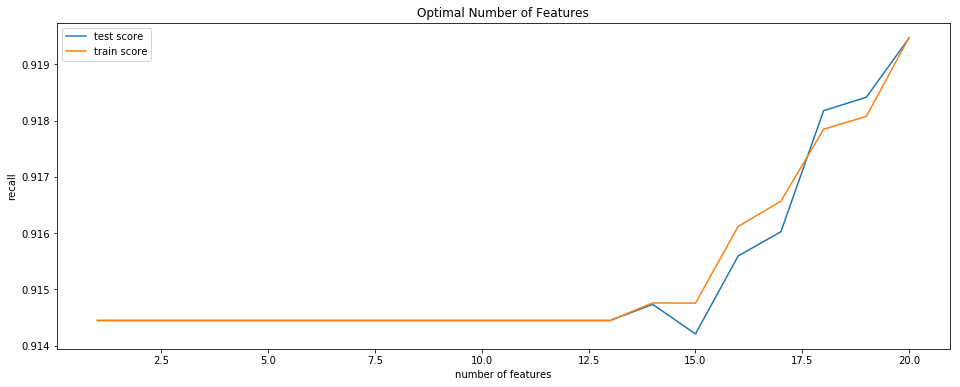

In [177]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('recall')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

So fitting the logistic regression with 20 features from the 30 column RFE and doing the corresponding Logistic Regression we get

In [178]:
X = df_logit_rfe.drop('churned',axis=1)
y= df_logit_rfe['churned']

In [179]:
no_rfe_features = model_cv.best_params_
logreg_rfe_final = LogisticRegression()
rfe = RFE(logreg_rfe_final,20)
rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[False  True  True  True  True False False  True False False  True  True
 False  True  True  True  True  True False  True  True  True False False
  True False  True  True  True  True]
[ 3  1  1  1  1  4  5  1  6 11  1  1 10  1  1  1  1  1  7  1  1  1  8  9
  1  2  1  1  1  1]


In [180]:
X.columns[rfe.support_]

Index(['roam_og_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8',
       'std_og_t2f_mou_8', 'std_ic_t2f_mou_8', 'ic_others_8',
       'total_rech_num_8', 'total_rech_data_8', 'count_rech_2g_8',
       'count_rech_3g_8', 'sachet_2g_8', 'fb_user_8', 'avg_count_rech_3g_6_7',
       'avg_count_rech_2g_6_7', 'avg_spl_ic_mou_6_7', 'avg_monthly_3g_6_7',
       'avg_std_og_t2f_mou_6_7', 'avg_sachet_2g_6_7', 'avg_total_rech_num_6_7',
       'avg_fb_user_6_7'],
      dtype='object')

In [181]:
X = X[X.columns[rfe.support_]]

In [182]:
X.head()

,roam_og_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2f_mou_8,std_ic_t2f_mou_8,ic_others_8,total_rech_num_8,total_rech_data_8,count_rech_2g_8,count_rech_3g_8,sachet_2g_8,fb_user_8,avg_count_rech_3g_6_7,avg_count_rech_2g_6_7,avg_spl_ic_mou_6_7,avg_monthly_3g_6_7,avg_std_og_t2f_mou_6_7,avg_sachet_2g_6_7,avg_total_rech_num_6_7,avg_fb_user_6_7
0,10.594,10.832,0.000,0.11,1.73,0.5,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.105,0.0,1.14,0.0,5.0,0.0
1,0.000,0.000,2.102,0.00,0.00,0.0,14.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000,0.0,0.00,0.5,19.0,1.0
2,1.440,10.832,0.490,0.00,1.73,0.5,11.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.105,0.0,0.00,0.0,5.0,0.0
3,0.000,10.260,0.000,0.00,1.73,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,8.0,0.0
4,10.594,0.000,0.000,0.00,0.00,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,10.5,0.0


In [183]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [184]:
print(len(X_train.columns),len(X_test.columns))

20 20


In [185]:
logsk = LogisticRegression()
logsk.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [186]:
from sklearn.model_selection import cross_val_predict

In [187]:
folds = StratifiedKFold(n_splits=10,shuffle=True,random_state=100)
cross_val_score(logsk,X_train,y_train,cv=folds,scoring='recall')

array([0.24022346, 0.25139665, 0.16759777, 0.20111732, 0.20670391,
       0.17877095, 0.2122905 , 0.21787709, 0.17877095, 0.17977528])

In [188]:
y_pred = logsk.predict_proba(X_test)

In [189]:
y_pred_df = pd.DataFrame(y_pred)

In [190]:
y_pred_df.head()

,0,1
0,0.848115,0.151885
1,0.853060,0.146940
2,0.969769,0.030231
3,0.605464,0.394536
4,0.864983,0.135017


In [191]:
y_pred_1 = y_pred_df.iloc[:,[1]]

In [192]:
y_pred_1.head()

,1
0,0.151885
1,0.146940
2,0.030231
3,0.394536
4,0.135017


In [193]:
y_test_df = pd.DataFrame(y_test)

In [194]:
y_test_df.head()

,churned
7717,0
2539,0
5585,0
29866,1
14490,0


In [195]:
y_test_df['CustID'] = y_test_df.index

In [196]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [197]:
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [198]:
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})

In [199]:
y_pred_final = y_pred_final.reindex_axis(['CustID','churned','Churn_Prob'], axis=1)

In [200]:
y_pred_final.head()

,CustID,churned,Churn_Prob
0,7717,0,0.151885
1,2539,0,0.146940
2,5585,0,0.030231
3,29866,1,0.394536
4,14490,0,0.135017


In [201]:
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [202]:
y_pred_final.head()

,CustID,churned,Churn_Prob,predicted
0,7717,0,0.151885,0
1,2539,0,0.146940,0
2,5585,0,0.030231,0
3,29866,1,0.394536,0
4,14490,0,0.135017,0


In [203]:
from sklearn import metrics

In [204]:
confusion_matrix = metrics.confusion_matrix(y_pred_final.churned,y_pred_final.predicted)

In [205]:
confusion_matrix

array([[8089,  105],
       [ 626,  142]], dtype=int64)

In [206]:
metrics.accuracy_score(y_pred_final.churned,y_pred_final.predicted)

0.9184333854050435

In [207]:
TP = confusion_matrix[1,1] # true positive
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [208]:
#Sensitivity
TP/(TP+FN)

0.18489583333333334

In [209]:
#Specificity
TN/(TN+FP)

0.9871857456675617

In [210]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,CustID,churned,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,7717,0,0.151885,0,1,1,0,0,0,0,0,0,0,0
1,2539,0,0.146940,0,1,1,0,0,0,0,0,0,0,0
2,5585,0,0.030231,0,1,0,0,0,0,0,0,0,0,0
3,29866,1,0.394536,0,1,1,1,1,0,0,0,0,0,0
4,14490,0,0.135017,0,1,1,0,0,0,0,0,0,0,0


In [211]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churned, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.085695  1.000000  0.000000
0.1   0.1  0.813992  0.807292  0.814620
0.2   0.2  0.896786  0.643229  0.920552
0.3   0.3  0.912631  0.453125  0.955699
0.4   0.4  0.917987  0.307292  0.975226
0.5   0.5  0.918433  0.184896  0.987186
0.6   0.6  0.917318  0.102865  0.993654
0.7   0.7  0.916202  0.037760  0.998536
0.8   0.8  0.914974  0.010417  0.999756
0.9   0.9  0.914305  0.000000  1.000000


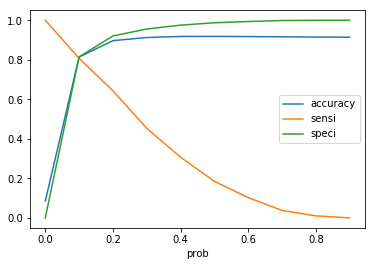

In [212]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [213]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

In [214]:
y_pred_final.head()

,CustID,churned,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,7717,0,0.151885,0,1,1,0,0,0,0,0,0,0,0,1
1,2539,0,0.146940,0,1,1,0,0,0,0,0,0,0,0,1
2,5585,0,0.030231,0,1,0,0,0,0,0,0,0,0,0,0
3,29866,1,0.394536,0,1,1,1,1,0,0,0,0,0,0,1
4,14490,0,0.135017,0,1,1,0,0,0,0,0,0,0,0,1


In [215]:
cm = metrics.confusion_matrix(y_pred_final.churned,y_pred_final.final_predicted)

In [216]:
cm

array([[6675, 1519],
       [ 148,  620]], dtype=int64)

In [217]:
cm[1,1]/(cm[1,1]+cm[1,0])

0.8072916666666666

In [218]:
metrics.precision_recall_fscore_support(y_pred_final.churned,y_pred_final.final_predicted)

(array([0.97830866, 0.28985507]),
 array([0.81462045, 0.80729167]),
 array([0.88899248, 0.42655659]),
 array([8194,  768], dtype=int64))

In [219]:
metrics.recall_score(y_pred_final.churned,y_pred_final.final_predicted)

0.8072916666666666

In [220]:
metrics.accuracy_score(y_pred_final.churned,y_pred_final.final_predicted)

0.8139924124079446

In [221]:
X.head()

,roam_og_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2f_mou_8,std_ic_t2f_mou_8,ic_others_8,total_rech_num_8,total_rech_data_8,count_rech_2g_8,count_rech_3g_8,sachet_2g_8,fb_user_8,avg_count_rech_3g_6_7,avg_count_rech_2g_6_7,avg_spl_ic_mou_6_7,avg_monthly_3g_6_7,avg_std_og_t2f_mou_6_7,avg_sachet_2g_6_7,avg_total_rech_num_6_7,avg_fb_user_6_7
0,10.594,10.832,0.000,0.11,1.73,0.5,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.105,0.0,1.14,0.0,5.0,0.0
1,0.000,0.000,2.102,0.00,0.00,0.0,14.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000,0.0,0.00,0.5,19.0,1.0
2,1.440,10.832,0.490,0.00,1.73,0.5,11.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.105,0.0,0.00,0.0,5.0,0.0
3,0.000,10.260,0.000,0.00,1.73,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,8.0,0.0
4,10.594,0.000,0.000,0.00,0.00,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,10.5,0.0


In [222]:
X.columns

Index(['roam_og_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8',
       'std_og_t2f_mou_8', 'std_ic_t2f_mou_8', 'ic_others_8',
       'total_rech_num_8', 'total_rech_data_8', 'count_rech_2g_8',
       'count_rech_3g_8', 'sachet_2g_8', 'fb_user_8', 'avg_count_rech_3g_6_7',
       'avg_count_rech_2g_6_7', 'avg_spl_ic_mou_6_7', 'avg_monthly_3g_6_7',
       'avg_std_og_t2f_mou_6_7', 'avg_sachet_2g_6_7', 'avg_total_rech_num_6_7',
       'avg_fb_user_6_7'],
      dtype='object')

Thus the above are the predictors for our use case. Thus key indiciators are outgoing calls in the 8th month and internet service usage in the good phase are the key indicators for churning of customers

Now building the logistic regression model with PCA. Though PCA should not be applied for this high imbalance class scenario, but still we use it nonetheless. However, we do not do an SVM as SVM works poorly in class imbalance scenarios. Also we don't use Naive Bayes as it is more appropriate for categorical data with Naive assumptions.

In [223]:
df_pre_pca = pd.read_csv('./telecom_churn_final_clean_dataset_after_outlier_treatment.csv')

In [224]:
df_pre_pca.describe()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,...,avg_std_ic_mou_6_7,avg_total_ic_mou_6_7,avg_sachet_3g_6_7,avg_isd_ic_mou_6_7,avg_std_og_t2f_mou_6_7,avg_sachet_2g_6_7,avg_total_rech_num_6_7,avg_jun_jul_vbc_3g,avg_night_pck_user_6_7,avg_fb_user_6_7
count,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,...,29873.000000,29873.000000,29873.0,29873.000000,29873.000000,29873.000000,29873.000000,29873.000000,29873.0,29873.000000
mean,470.181393,183.214635,303.966353,0.938876,1.801992,50.398546,131.326152,2.831965,0.397580,206.147670,...,29.724957,254.092200,0.0,1.550318,0.213734,0.200967,10.648177,48.082897,0.0,0.408965
std,249.093219,184.436292,226.032069,2.010013,3.871397,50.507943,115.851922,4.063542,0.778813,175.950175,...,29.042001,177.565585,0.0,2.919984,0.422799,0.376003,5.088903,90.163155,0.0,0.491651
min,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.500000,0.000000,0.0,0.000000
25%,290.926000,34.010000,111.890000,0.000000,0.000000,7.730000,28.480000,0.000000,0.000000,47.930000,...,5.145000,103.450000,0.0,0.000000,0.000000,0.000000,6.500000,0.000000,0.0,0.000000
50%,453.108000,106.580000,252.240000,0.000000,0.000000,30.840000,96.040000,0.310000,0.000000,157.760000,...,18.435000,211.675000,0.0,0.000000,0.000000,0.000000,9.500000,0.000000,0.0,0.000000
75%,672.235000,298.930000,484.190000,0.000000,0.000000,84.860000,224.280000,4.690000,0.050000,349.090000,...,50.245000,396.115000,0.0,0.815000,0.000000,0.000000,15.000000,25.125000,0.0,1.000000
max,840.795400,524.582000,681.430000,5.500000,10.594000,142.186000,328.640000,10.832000,2.102000,501.950000,...,81.886000,548.671000,0.0,7.857000,1.140000,1.000000,19.000000,240.725000,0.0,1.000000


In [225]:
df_pre_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29873 entries, 0 to 29872
Columns: 102 entries, arpu_8 to avg_fb_user_6_7
dtypes: float64(101), int64(1)
memory usage: 23.2 MB


In [226]:
from sklearn.preprocessing import StandardScaler

In [227]:
scaler = StandardScaler()

In [228]:
X = df_pre_pca.drop('churned',axis=1)
y =  df_pre_pca['churned']

In [229]:
X = scaler.fit_transform(X)

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [231]:
y_train.mean()

0.085553058199034

In [232]:
y_test.mean()

0.08569515733095291

In [233]:
from sklearn.decomposition import PCA

In [234]:
pca = PCA(svd_solver='randomized',random_state=42)

In [235]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [236]:
pca.components_

array([[ 7.32072475e-02, -5.03514466e-02,  4.69246183e-03, ...,
         1.64378431e-01,  0.00000000e+00,  1.78692551e-01],
       [ 1.20345037e-01,  9.20959249e-02,  1.63946900e-01, ...,
        -8.10015235e-02,  0.00000000e+00, -1.09633876e-01],
       [ 2.01997124e-01,  1.87644283e-01,  1.43670857e-01, ...,
         2.66990072e-02, -0.00000000e+00,  4.93465164e-02],
       ...,
       [-0.00000000e+00, -2.12962577e-16,  7.82190437e-17, ...,
         4.77048956e-18, -0.00000000e+00, -1.45499932e-16],
       [-0.00000000e+00,  2.00523780e-17, -1.47607068e-17, ...,
        -1.12479579e-17, -0.00000000e+00,  1.79257098e-17],
       [-0.00000000e+00, -2.79184610e-33,  1.87051998e-32, ...,
         7.36668204e-33,  1.00000000e+00,  6.93334780e-33]])

In [237]:
pca.components_.shape

(101, 101)

In [238]:
pca.explained_variance_ratio_

array([1.82280475e-01, 1.25950844e-01, 9.21132891e-02, 5.32976508e-02,
       4.33902637e-02, 3.37417447e-02, 3.04600058e-02, 2.94104989e-02,
       2.40294107e-02, 2.29590181e-02, 2.00678701e-02, 1.95136780e-02,
       1.77339149e-02, 1.71866515e-02, 1.55079456e-02, 1.46703018e-02,
       1.41911526e-02, 1.25978380e-02, 1.20166256e-02, 1.14922753e-02,
       1.04913692e-02, 1.00804791e-02, 9.73063266e-03, 9.11439200e-03,
       8.71454263e-03, 8.07628141e-03, 7.72731336e-03, 7.48248348e-03,
       7.15496567e-03, 6.59219015e-03, 6.51303269e-03, 6.21267770e-03,
       6.01577599e-03, 5.64063078e-03, 5.49138998e-03, 5.30462490e-03,
       4.89706644e-03, 4.57011654e-03, 4.37663895e-03, 3.87357641e-03,
       3.69183264e-03, 3.52080112e-03, 3.37270353e-03, 2.98711711e-03,
       2.86595346e-03, 2.80690263e-03, 2.76335854e-03, 2.71249388e-03,
       2.58680612e-03, 2.45151563e-03, 2.37153944e-03, 2.30289517e-03,
       2.11218544e-03, 1.93949900e-03, 1.90759581e-03, 1.85287124e-03,
      

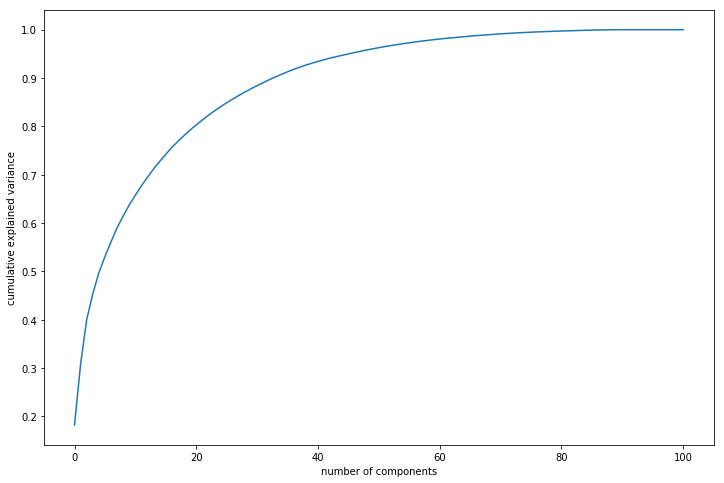

In [239]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [240]:
pca_final = PCA(0.90)

In [241]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(20911, 34)

In [242]:
df_test_pca = pca_final.transform(X_test)

In [243]:
df_test_pca.shape

(8962, 34)

In [244]:
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [245]:
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]

In [246]:
pred_probs_test.shape

(8962,)

In [247]:
pred_probs_test

array([0.02614536, 0.19470499, 0.00234562, ..., 0.00279097, 0.01251316,
       0.0104295 ])

In [248]:
type(pred_probs_test)

numpy.ndarray

In [249]:
y_pred_df = pd.DataFrame(pred_probs_test)

In [250]:
y_pred_df.head()

,0
0,0.026145
1,0.194705
2,0.002346
3,0.169344
4,0.029876


In [251]:
y_test_df = pd.DataFrame(y_test)

In [252]:
y_test_df.head()

,churned
7717,0
2539,0
5585,0
29866,1
14490,0


In [253]:
y_test_df['CustID'] = y_test_df.index

In [254]:
y_test_df.head()

,churned,CustID
7717,0,7717
2539,0,2539
5585,0,5585
29866,1,29866
14490,0,14490


In [255]:
y_test_df.reset_index(drop=True,inplace=True)
y_pred_df.reset_index(drop=True,inplace=True)

In [256]:
y_test_df.head()

,churned,CustID
0,0,7717
1,0,2539
2,0,5585
3,1,29866
4,0,14490


In [257]:
y_pred_df.head()

,0
0,0.026145
1,0.194705
2,0.002346
3,0.169344
4,0.029876


In [258]:
y_pred_final = pd.concat([y_test_df,y_pred_df],axis=1)

In [259]:
y_pred_final.head()

,churned,CustID,0
0,0,7717,0.026145
1,0,2539,0.194705
2,0,5585,0.002346
3,1,29866,0.169344
4,0,14490,0.029876


In [260]:
y_pred_final.rename(columns={0:'churned_prob'},inplace=True)

In [261]:
y_pred_final.head()

,churned,CustID,churned_prob
0,0,7717,0.026145
1,0,2539,0.194705
2,0,5585,0.002346
3,1,29866,0.169344
4,0,14490,0.029876


In [262]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churned_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churned,CustID,churned_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,7717,0.026145,1,0,0,0,0,0,0,0,0,0
1,0,2539,0.194705,1,1,0,0,0,0,0,0,0,0
2,0,5585,0.002346,1,0,0,0,0,0,0,0,0,0
3,1,29866,0.169344,1,1,0,0,0,0,0,0,0,0
4,0,14490,0.029876,1,0,0,0,0,0,0,0,0,0


In [263]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churned, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.085695  1.000000  0.000000
0.1   0.1  0.847467  0.802083  0.851721
0.2   0.2  0.909842  0.701823  0.929339
0.3   0.3  0.923789  0.578125  0.956187
0.4   0.4  0.926244  0.433594  0.972419
0.5   0.5  0.924905  0.286458  0.984745
0.6   0.6  0.922227  0.177083  0.992067
0.7   0.7  0.917987  0.080729  0.996461
0.8   0.8  0.915755  0.024740  0.999268
0.9   0.9  0.914416  0.002604  0.999878


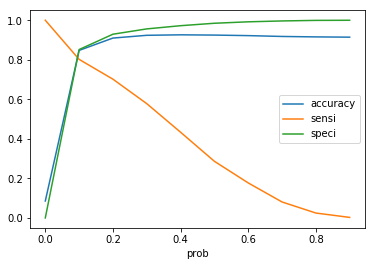

In [264]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [265]:
y_pred_final['final_predicted'] = y_pred_final.churned_prob.map( lambda x: 1 if x > 0.1 else 0)

In [266]:
metrics.recall_score(y_test,y_pred_final.final_predicted)

0.8020833333333334

As we can see we have a marginal improve with PCA because of class imbalance. Also the number of PCA components are 34 which explains 90% variance. Hence Logistic Regression with PCA is not the ideal model. Thus best model to pursue would be an ensemble learning like Random Forest.

We start off again from the data set which we created earlier before the EDA and outlier treatment step, but after the data cleaning step since Random forests are immune to outliers

In [267]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('./telecom_churn_final_clean_dataset.csv')

In [268]:
# Let's understand the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29873 entries, 0 to 29872
Columns: 102 entries, arpu_8 to avg_fb_user_6_7
dtypes: float64(90), int64(12)
memory usage: 23.2 MB


In [269]:
df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,...,avg_std_ic_mou_6_7,avg_total_ic_mou_6_7,avg_sachet_3g_6_7,avg_isd_ic_mou_6_7,avg_std_og_t2f_mou_6_7,avg_sachet_2g_6_7,avg_total_rech_num_6_7,avg_jun_jul_vbc_3g,avg_night_pck_user_6_7,avg_fb_user_6_7
0,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,...,176.810,592.250,0.0,8.295,13.37,0.0,5.0,19.060,0,0
1,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,...,13.545,66.175,0.0,0.000,0.00,0.5,20.0,516.405,0,1
2,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,...,245.950,570.595,0.0,153.695,0.00,0.0,5.0,0.000,0,0
3,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,...,119.860,373.210,0.0,0.000,0.00,0.0,8.0,12.170,0,0
4,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,...,4.955,47.095,0.0,0.000,0.00,0.0,10.5,0.000,0,0


In [270]:
# Putting feature variable to X
X = df.drop('churned',axis=1)

In [271]:
# Putting response variable to y
y = df['churned']

In [272]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 100)
X_train.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,...,avg_std_ic_mou_6_7,avg_total_ic_mou_6_7,avg_sachet_3g_6_7,avg_isd_ic_mou_6_7,avg_std_og_t2f_mou_6_7,avg_sachet_2g_6_7,avg_total_rech_num_6_7,avg_jun_jul_vbc_3g,avg_night_pck_user_6_7,avg_fb_user_6_7
1424,1083.233,416.03,510.49,0.00,0.00,54.46,350.21,33.56,0.00,438.24,...,52.560,255.985,0.0,0.0,0.08,0.0,10.5,0.0,0,1
18814,195.641,27.23,34.06,0.00,0.00,0.00,6.03,0.00,0.08,6.03,...,133.645,392.475,0.5,0.0,0.00,1.5,20.5,0.0,0,1
13022,550.821,143.26,761.88,0.00,0.00,36.23,136.99,0.51,0.60,173.74,...,11.195,95.995,0.0,0.0,0.00,0.0,6.0,0.0,0,0
29868,303.172,4.96,462.19,0.00,0.00,0.00,18.91,0.00,0.00,18.91,...,20.920,71.160,0.0,0.0,0.00,0.0,27.5,0.0,0,0
10242,951.354,54.93,565.66,72.94,88.13,17.04,127.53,6.91,0.00,151.49,...,0.000,0.000,0.0,0.0,0.00,0.0,5.0,0.0,0,1


In [273]:
#### Default Hyperparameters
#Let's first fit a random forest model with default hyperparameters.

In [274]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [275]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight={0:1,1:20})

In [276]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 20},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [277]:
# Making predictions
predictions = rfc.predict(X_test)

In [278]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report

In [279]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      8194
          1       0.72      0.40      0.52       768

avg / total       0.93      0.94      0.93      8962



In [280]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[8076  118]
 [ 457  311]]


In [281]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.9358402142378933


Since the recall is quite low, this is surely due to class imbalance. Lets tune the hyperparameters and also alleviate the problem of class imbalance through using class_weight where we give more weightage to our positive class rather than the negative class. What weight to give is also found out using hyper-parameter tuning

We can now find the optimal hyperparameters using GridSearchCV.

In [282]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200,300], 
    'max_features': [5, 10],
    'class_weight':[{0:1,1:5},{0:1,1:10},{0:1,1:15},{0:1,1:20}]
}
# Create a based model
rf = RandomForestClassifier(n_jobs=-1)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,scoring='recall')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 14.2min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10], 'class_weight': [{0: 1, 1: 5}, {0: 1, 1: 10}, {0: 1, 1: 15}, {0: 1, 1: 20}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

In [283]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.8787011179518129 using {'class_weight': {0: 1, 1: 20}, 'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 300, 'min_samples_split': 400, 'n_estimators': 100}


**Fitting the final model with the best parameters obtained from grid search.**

In [288]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=300, 
                             min_samples_split=400,
                             max_features=5,
                             n_estimators=100,
                             class_weight={0:1,1:20})

In [289]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 20},
            criterion='gini', max_depth=4, max_features=5,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=300,
            min_samples_split=400, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [290]:
# predict
predictions = rfc.predict(X_test)

In [291]:
print(classification_report(y_test,predictions))

print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       0.98      0.75      0.85      8194
          1       0.24      0.87      0.38       768

avg / total       0.92      0.76      0.81      8962

[[6115 2079]
 [  97  671]]


Thus as we see we now have an accuracy of 92% with a recall of 87% on the positive class. Thus Random forest with the above parameters is our final model for churn prediction. We had to do a class weight of 1:20 as suggested by the grid search because of high class imbalance.